# **1. LOAD DATA**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)



In [3]:
df_2022 = pd.read_csv('/content/drive/MyDrive/diemthi_thpt_2020_2024/diem_thi_thpt_2022.csv')
df_2023 = pd.read_csv('/content/drive/MyDrive/diemthi_thpt_2020_2024/diem_thi_thpt_2023.csv')
df_2024 = pd.read_csv('/content/drive/MyDrive/diemthi_thpt_2020_2024/diem_thi_thpt_2024.csv')
df_2025_1 = pd.read_csv('/content/drive/MyDrive/diemthi_thpt_2020_2024/20250715-ketquathi-ct2018b.csv')
df_2025_2 = pd.read_csv('/content/drive/MyDrive/diemthi_thpt_2020_2024/20250715-ketquathi-ct2018a.csv')
df_2025_3 = pd.read_csv('/content/drive/MyDrive/diemthi_thpt_2020_2024/diem_thi_2025_3.csv')


# **2. DATA CLEANING**

## **2.1. Data type, null values, duplicate values**

In [4]:
df_2022.sort_values(by = 'sbd', ascending=True).head(3)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   3.6     5.00        4.0     NaN      NaN       NaN     2.75   
1  1000002   8.4     6.75        7.6     NaN      NaN       NaN     8.50   
2  1000003   5.8     7.50        5.0     NaN      NaN       NaN     7.25   

   dia_li  gdcd  
0     6.0  8.75  
1     7.5  8.25  
2     5.5  8.75

In [5]:
df_2023.sort_values(by = 'sbd', ascending=True).head(3)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   8.4      8.5        9.2     NaN      NaN       NaN     6.75   
1  1000002   7.2      8.5        9.2     NaN      NaN       NaN     8.75   
2  1000003   NaN      6.5        NaN     NaN      NaN       NaN     9.25   

   dia_li  gdcd ma_ngoai_ngu  
0     6.0   9.0           N1  
1     6.5   8.5           N1  
2     7.5   NaN          NaN

In [6]:
df_2024.sort_values(by = 'sbd', ascending=True).head(3)

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  lich_su  \
0  1000001   8.4     6.75        8.0     6.0     5.25       5.0      NaN   
1  1000002   8.6     8.50        7.2     NaN      NaN       NaN     7.25   
2  1000003   8.2     8.75        8.2     NaN      NaN       NaN     7.25   

   dia_li  gdcd ma_ngoai_ngu  
0     NaN   NaN           N1  
1    6.00  8.00           N1  
2    7.25  8.75           N1

In [7]:
df_2025_1.sort_values(by = 'SOBAODANH', ascending=True).head(3)

STT  SOBAODANH  Toán   Văn    Lí   Hóa  Sinh  Tin học  \
0    1    1000001  5.75  7.75   NaN  7.75  8.25      NaN   
1    2    1000002  8.00  8.25  8.50  6.75   NaN      NaN   
2    3    1000003  6.75  8.50  8.75   NaN   NaN      NaN   

   Công nghệ công nghiệp  Công nghệ nông nghiệp  Sử  Địa  \
0                    NaN                    NaN NaN  NaN   
1                    NaN                    NaN NaN  NaN   
2                    NaN                    NaN NaN  NaN   

   Giáo dục kinh tế và pháp luật  Ngoại ngữ Mã môn ngoại ngữ  
0                            NaN        NaN              NaN  
1                            NaN        NaN              NaN  
2                            NaN        NaN              NaN

In [8]:
df_2025_2.sort_values(by = 'SOBAODANH', ascending=True).head(3)

STT  SOBAODANH  Toán   Văn   Lí   Hóa  Sinh  Tin học  \
0  1000001   52013349  3.25  6.75  5.5   NaN   NaN      NaN   
1  1000002   52013350  3.25  5.25  6.0  3.25   NaN      NaN   
2  1000003   52013351  4.50  7.00  4.1  3.45   NaN      NaN   

   Công nghệ công nghiệp  Công nghệ nông nghiệp  Sử  Địa  \
0                    NaN                    NaN NaN  NaN   
1                    NaN                    NaN NaN  NaN   
2                    NaN                    NaN NaN  NaN   

   Giáo dục kinh tế và pháp luật  Ngoại ngữ Mã môn ngoại ngữ  
0                            NaN        4.5               N1  
1                            NaN        NaN              NaN  
2                            NaN        NaN              NaN

In [9]:
df_2025_3.sort_values(by = 'SOBAODANH', ascending=True).head(3)

STT  SOBAODANH  Toán  Văn    Lí   Hóa  Sinh  Sử  Địa  Giáo dục công dân  \
0    1    1017985   9.0  NaN  8.25  8.50   3.0 NaN  NaN                NaN   
1    2    1017986   NaN  8.5   NaN   NaN   NaN NaN  NaN                NaN   
2    3    1017988   8.2  7.0  5.75  4.25   NaN NaN  NaN                NaN   

   Ngoại ngữ Mã môn ngoại ngữ  
0        NaN              NaN  
1        NaN              NaN  
2        8.6               N1

In [10]:
df_2022['ma_ngoai_ngu'] = None
df_2022['year'] = 2022
df_2023['year'] = 2023
df_2024['year'] = 2024


In [11]:
df_2025_1 = df_2025_1[['SOBAODANH', 'Toán', 'Văn', 'Ngoại ngữ', 'Lí', 'Hóa', 'Sinh', 'Sử', 'Địa', 'Giáo dục kinh tế và pháp luật', 'Mã môn ngoại ngữ']]
df_2025_1.columns = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'ma_ngoai_ngu']
df_2025_1['year'] = 2025

In [12]:
df_2025_2 = df_2025_2[['SOBAODANH', 'Toán', 'Văn', 'Ngoại ngữ', 'Lí', 'Hóa', 'Sinh', 'Sử', 'Địa', 'Giáo dục kinh tế và pháp luật', 'Mã môn ngoại ngữ']]
df_2025_2.columns = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'ma_ngoai_ngu']
df_2025_2['year'] = 2025

In [13]:
df_2025_3 = df_2025_3[['SOBAODANH', 'Toán', 'Văn', 'Ngoại ngữ', 'Lí', 'Hóa', 'Sinh', 'Sử', 'Địa', 'Giáo dục công dân', 'Mã môn ngoại ngữ']]
df_2025_3.columns = ['sbd', 'toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd', 'ma_ngoai_ngu']
df_2025_3['year'] = 2025

## **2.2. Concat all table**

In [14]:
df_all = pd.concat([df_2022, df_2023, df_2024, df_2025_1, df_2025_2, df_2025_3], ignore_index=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232332 entries, 0 to 4232331
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sbd           int64  
 1   toan          float64
 2   ngu_van       float64
 3   ngoai_ngu     float64
 4   vat_li        float64
 5   hoa_hoc       float64
 6   sinh_hoc      float64
 7   lich_su       float64
 8   dia_li        float64
 9   gdcd          float64
 10  ma_ngoai_ngu  object 
 11  year          int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 387.5+ MB


## **2.3. Create province table**

In [15]:
#tạo dictionary trực tiếp
province_code_map = {
    '1': 'Hà Nội', '2': 'TP. Hồ Chí Minh', '3': 'Hải Phòng', '4': 'Đà Nẵng',
    '5': 'Hà Giang', '6': 'Cao Bằng', '7': 'Lai Châu', '8': 'Lào Cai',
    '9': 'Tuyên Quang', '10': 'Lạng Sơn', '11': 'Bắc Kạn', '12': 'Thái Nguyên',
    '13': 'Yên Bái', '14': 'Sơn La', '15': 'Phú Thọ', '16': 'Vĩnh Phúc',
    '17': 'Quảng Ninh', '18': 'Bắc Giang', '19': 'Bắc Ninh', '21': 'Hải Dương',
    '22': 'Hưng Yên', '23': 'Hòa Bình', '24': 'Hà Nam', '25': 'Nam Định',
    '26': 'Thái Bình', '27': 'Ninh Bình', '28': 'Thanh Hóa', '29': 'Nghệ An',
    '30': 'Hà Tĩnh', '31': 'Quảng Bình', '32': 'Quảng Trị', '33': 'Thừa Thiên Huế',
    '34': 'Quảng Nam', '35': 'Quảng Ngãi', '36': 'Kon Tum', '37': 'Bình Định',
    '38': 'Gia Lai', '39': 'Phú Yên', '40': 'Đắk Lắk', '41': 'Khánh Hòa',
    '42': 'Lâm Đồng', '43': 'Bình Phước', '44': 'Bình Dương', '45': 'Ninh Thuận',
    '46': 'Tây Ninh', '47': 'Bình Thuận', '48': 'Đồng Nai', '49': 'Long An',
    '50': 'Đồng Tháp', '51': 'An Giang', '52': 'Bà Rịa - Vũng Tàu', '53': 'Tiền Giang',
    '54': 'Kiên Giang', '55': 'Cần Thơ', '56': 'Bến Tre', '57': 'Vĩnh Long',
    '58': 'Trà Vinh', '59': 'Sóc Trăng', '60': 'Bạc Liêu', '61': 'Cà Mau',
    '62': 'Điện Biên', '63': 'Đắk Nông', '64': 'Hậu Giang'
}

In [16]:
# Hàm lấy code tỉnh từ SBD
def province_code(x):
    x = str(x)
    return x[0] if len(x) == 7 else x[:2]

# Tạo cột 'code' tạm
df_all['code'] = df_all['sbd'].apply(province_code)

#ánh xạ code vào tên tỉnh bằng cách sử dụng full dictionary
df_all['province'] = df_all['code'].map(province_code_map)

In [17]:
df_all = df_all.drop(columns='code')


In [18]:
df_all

sbd  toan  ngu_van  ngoai_ngu  vat_li  hoa_hoc  sinh_hoc  \
0         1000001   3.6     5.00        4.0     NaN      NaN       NaN   
1         1000002   8.4     6.75        7.6     NaN      NaN       NaN   
2         1000003   5.8     7.50        5.0     NaN      NaN       NaN   
3         1000004   7.4     7.50        8.6     NaN      NaN       NaN   
4         1000005   7.2     8.50        9.0     NaN      NaN       NaN   
...           ...   ...      ...        ...     ...      ...       ...   
4232327  64007422   NaN     8.00        8.6     NaN      NaN       NaN   
4232328  64007423   8.2     9.50        7.8     NaN      NaN       NaN   
4232329  64007424   7.8      NaN        NaN    6.25      6.5       NaN   
4232330  64007425   6.8     8.25        4.6     NaN      NaN       NaN   
4232331  64007426   NaN     6.00        NaN     NaN      NaN       NaN   

         lich_su  dia_li  gdcd ma_ngoai_ngu  year   province  
0           2.75    6.00  8.75         None  2022     Hà Nội  
1           8.50    7.50  8.25         None  2022     Hà Nội  
2           7.25    5.50  8.75         None  2022     Hà Nội  
3           7.50    6.50  7.50         None  2022     Hà Nội  
4           8.00    8.50  8.25         None  2022     Hà Nội  
...          ...     ...   ...          ...   ...        ...  
4232327     9.00     NaN  9.75           N1  2025  Hậu Giang  
4232328      NaN     NaN   NaN           N1  2025  Hậu Giang  
4232329      NaN     NaN   NaN          NaN  2025  Hậu Giang  
4232330      NaN     NaN   NaN           N1  2025  Hậu Giang  
4232331     5.00    6.75   NaN          NaN  2025  Hậu Giang  

[4232332 rows x 13 columns]

# **3. ANALYZE**

## **3.1. Overview**

In [19]:
df_all['year'] = df_all['year'].astype(str)

In [20]:
df_all['year'].unique()

array(['2022', '2023', '2024', '2025'], dtype=object)

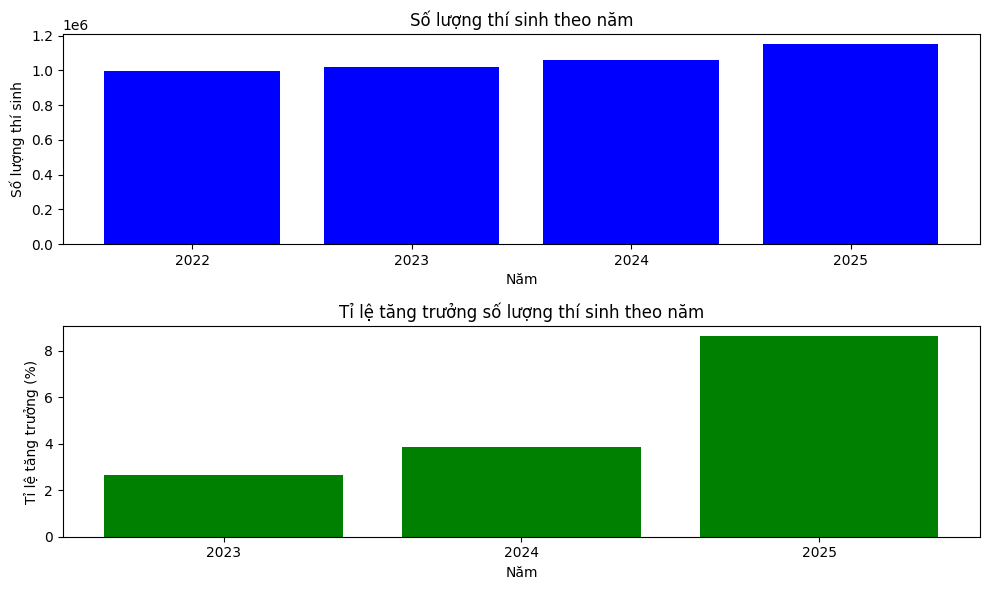

In [21]:
data = df_all

#số lượng thí sinh mỗi năm
students_per_year = data['year'].value_counts().sort_index()

#tính tỉ lệ tăng trưởng
growth_rates = students_per_year.pct_change() * 100

#tạo data frame để show kết quả
students_growth_df = pd.DataFrame({
    'Số lượng thí sinh': students_per_year,
    'Tỉ lệ tăng trưởng (%)': growth_rates
}).reset_index().rename(columns={'index': 'year'})

#vẽ biểu đồ
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

#vẽ số lượng thí sinh
ax[0].bar(students_growth_df['year'], students_growth_df['Số lượng thí sinh'], color = 'blue')
ax[0].set_xlabel('Năm')
ax[0].set_ylabel('Số lượng thí sinh')
ax[0].set_title('Số lượng thí sinh theo năm')
ax[0].grid(False)

#vẽ tỉ lệ tăng trưởng
ax[1].bar(students_growth_df['year'], students_growth_df['Tỉ lệ tăng trưởng (%)'], color = 'green')
ax[1].set_xlabel('Năm')
ax[1].set_ylabel('Tỉ lệ tăng trưởng (%)')
ax[1].set_title('Tỉ lệ tăng trưởng số lượng thí sinh theo năm')
ax[1].grid(False)

#hiển thị biểu đồ
plt.tight_layout()
plt.show()

### **a. Scores distribution over year**

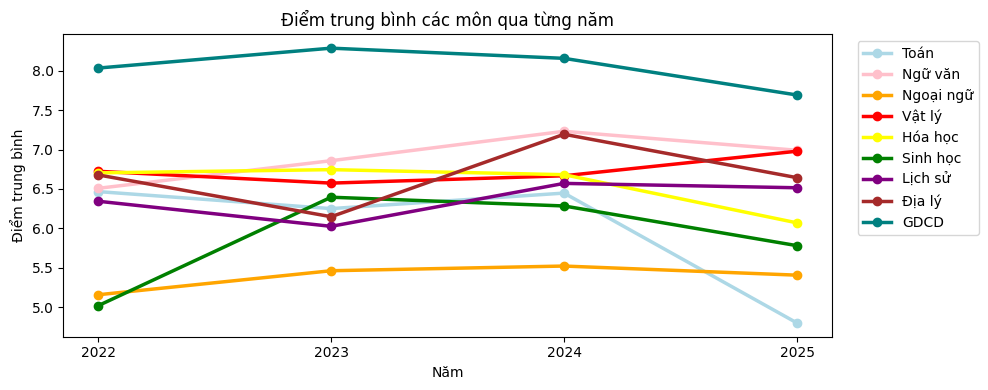

In [22]:
import numpy as np
import matplotlib.pyplot as plt

data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

x_year = [2022, 2023, 2024, 2025]

# Định nghĩa các môn học và tiêu đề
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
titles = ['Toán', 'Ngữ văn', 'Ngoại ngữ', 'Vật lý', 'Hóa học', 'Sinh học', 'Lịch sử', 'Địa lý', 'GDCD']
colors = ['lightblue', 'pink', 'orange', 'red', 'yellow', 'green', 'purple', 'brown', 'teal']

# Tính toán điểm trung bình các môn qua từng năm
mean_scores_by_year = data.groupby(['year'])[subjects].mean().reset_index()

# Vẽ biểu đồ đường cho từng môn (KHÔNG làm mịn)
plt.figure(figsize=(10, 4))
for i, subject in enumerate(subjects):
    x = mean_scores_by_year['year']
    y = mean_scores_by_year[subject]

    # Plot trực tiếp không qua interpolation
    plt.plot(x, y, label=titles[i], linewidth=2.5, alpha=1, marker='o', color = colors[i])

plt.title('Điểm trung bình các môn qua từng năm')
plt.xlabel('Năm')
plt.ylabel('Điểm trung bình')
plt.xticks(x_year)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(False)
plt.tight_layout()
plt.show()

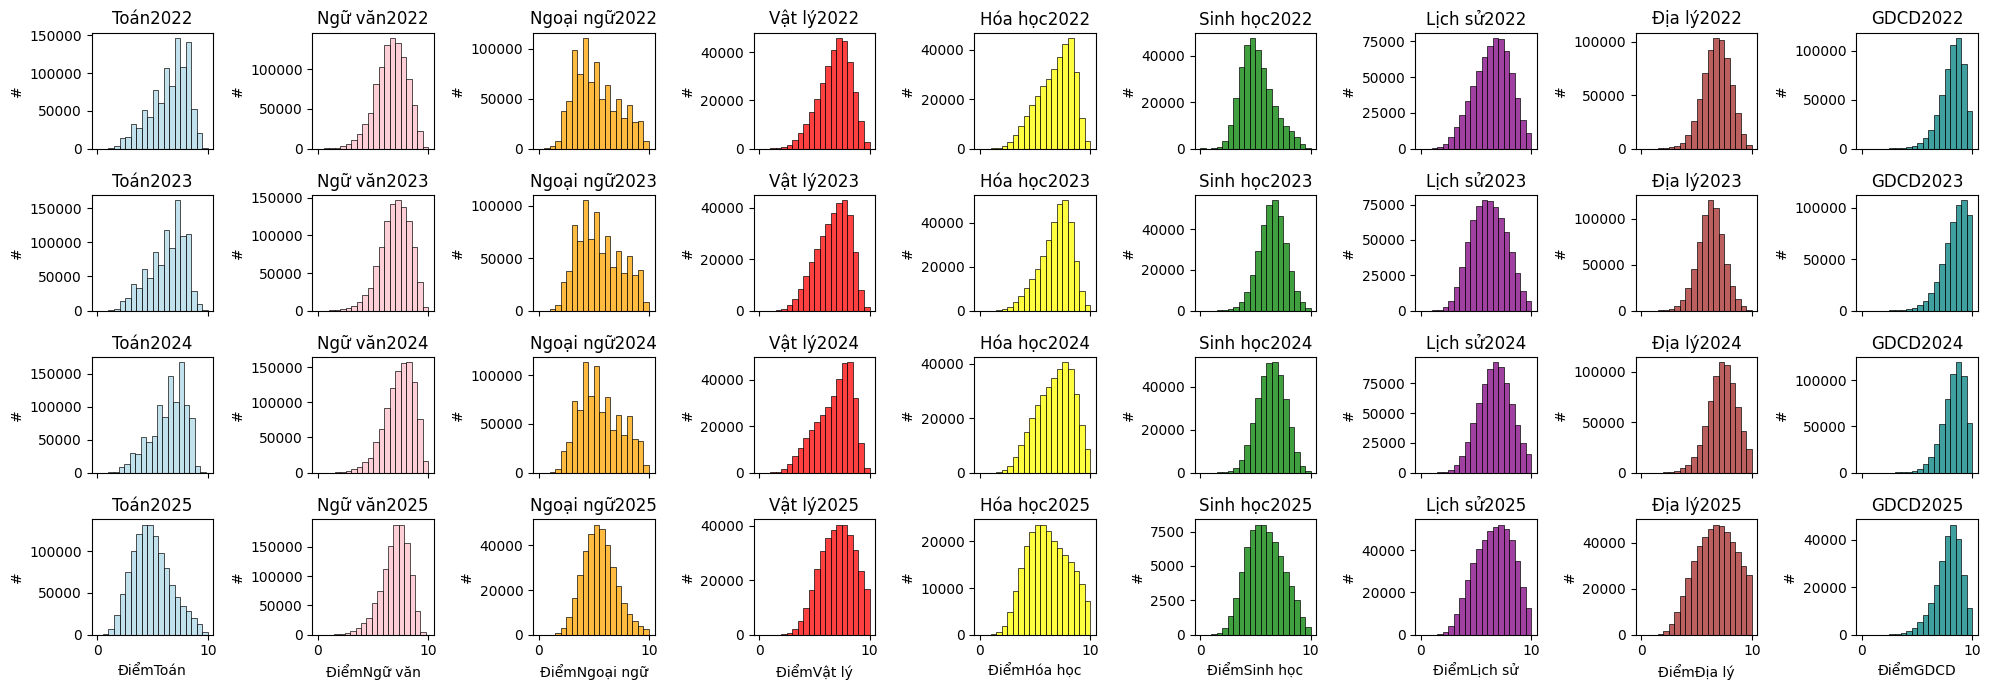

In [23]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]

#tạo histogram cho điểm các môn học
fig, ax = plt.subplots(4, 9, figsize=(20, 7), sharex = True)

# Định nghĩa các môn học và tiêu đề
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
titles = ['Toán', 'Ngữ văn', 'Ngoại ngữ', 'Vật lý', 'Hóa học', 'Sinh học', 'Lịch sử', 'Địa lý', 'GDCD']
colors = ['lightblue', 'pink', 'orange', 'red', 'yellow', 'green', 'purple', 'brown', 'teal']

#các năm học sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng môn
for i, year in enumerate(recent_years_sorted):
    for j, (subject, color) in enumerate(zip(subjects, colors)):
        sns.histplot(recent_years[recent_years['year'] == year][subject], bins = 20, kde = False, ax = ax[i, j], edgecolor = 'black', color = color)
        ax[i, j].set_title(f'{titles[j]}{year}')
        ax[i, j].set_xlabel(f'Điểm{titles[j]}')
        ax[i, j].set_ylabel('#')
plt.tight_layout()
plt.show()

### **b. Subject**

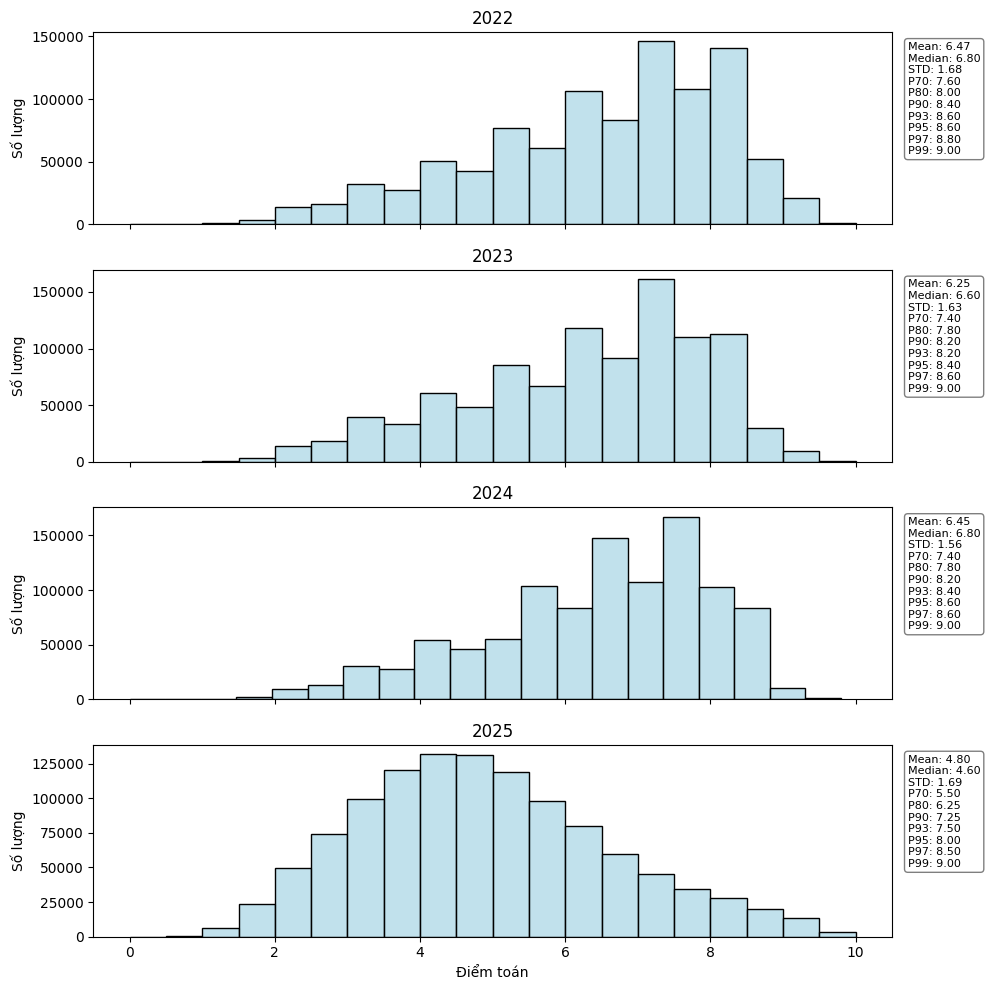

In [24]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm toán trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['toan'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'lightblue')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm toán')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['toan'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


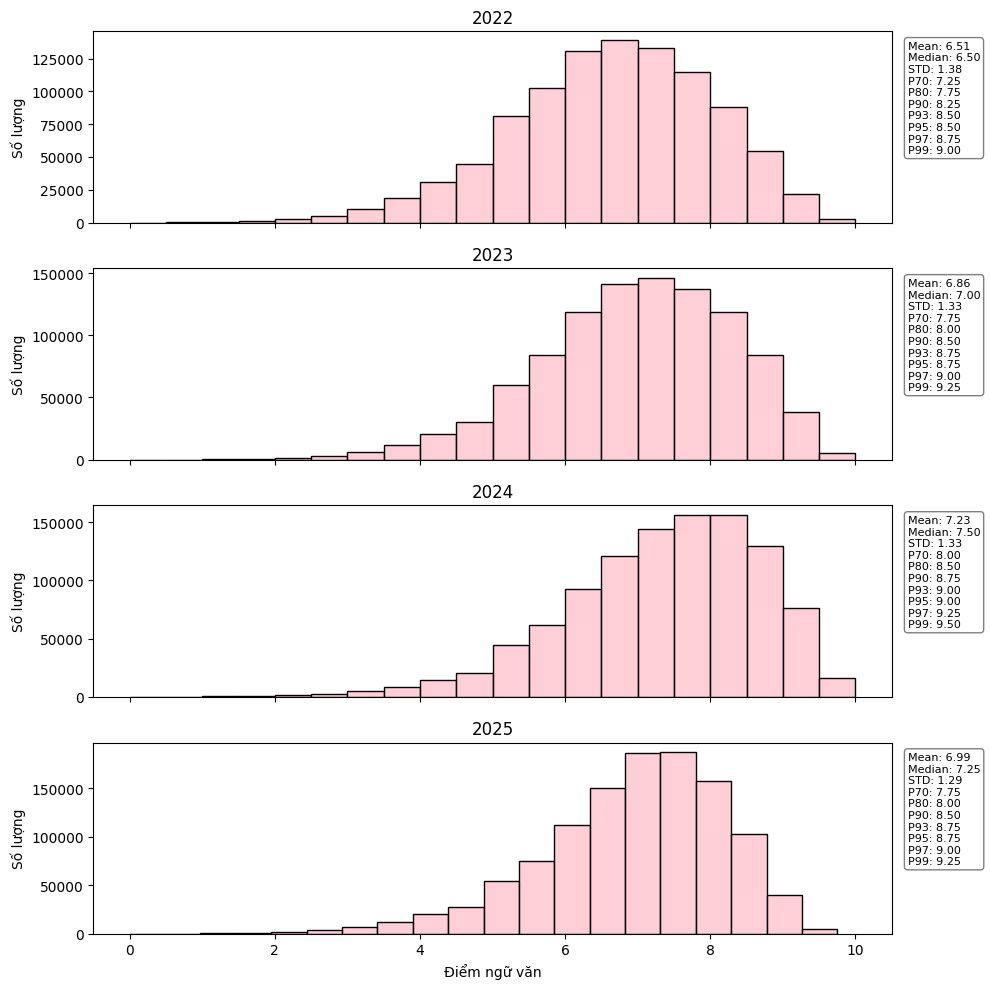

In [25]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm văn trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['ngu_van'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'pink')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm ngữ văn')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['ngu_van'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

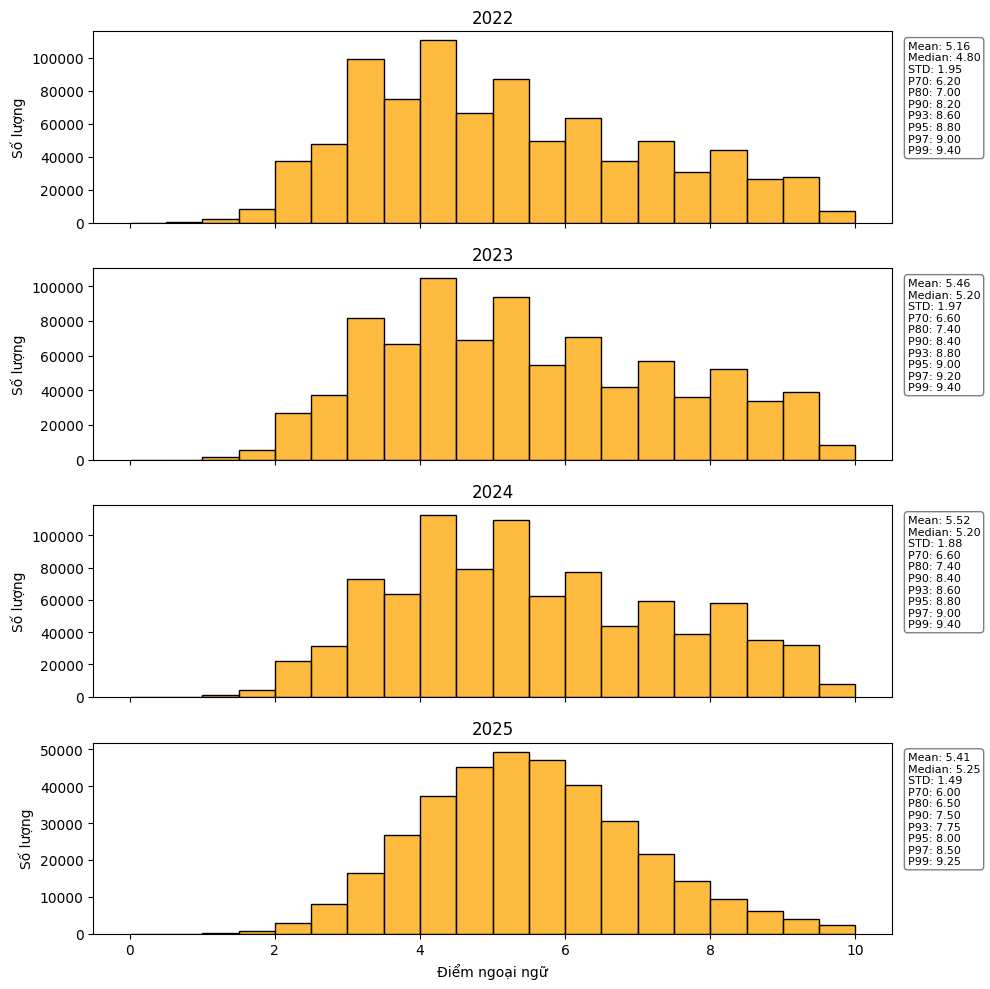

In [26]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm ngoại ngữ trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['ngoai_ngu'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'orange')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm ngoại ngữ')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['ngoai_ngu'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

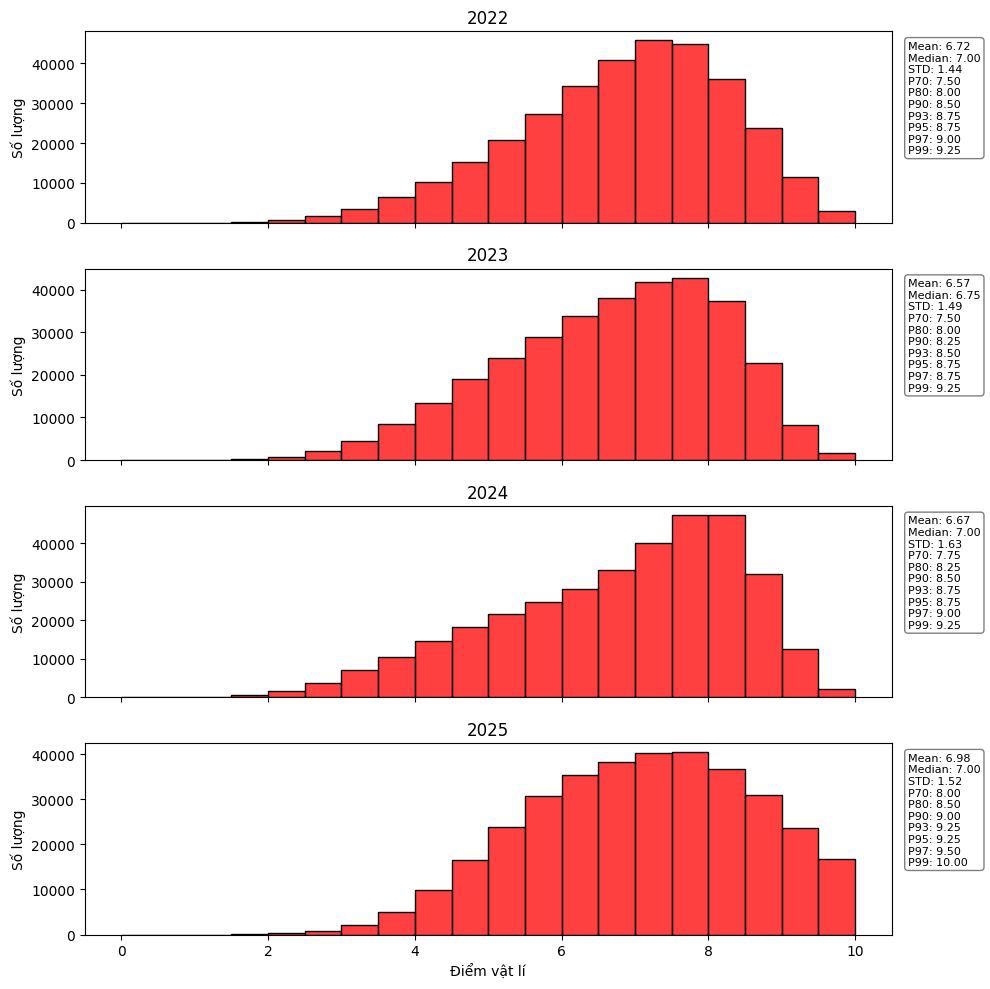

In [27]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm lí trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['vat_li'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'red')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm vật lí')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['vat_li'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

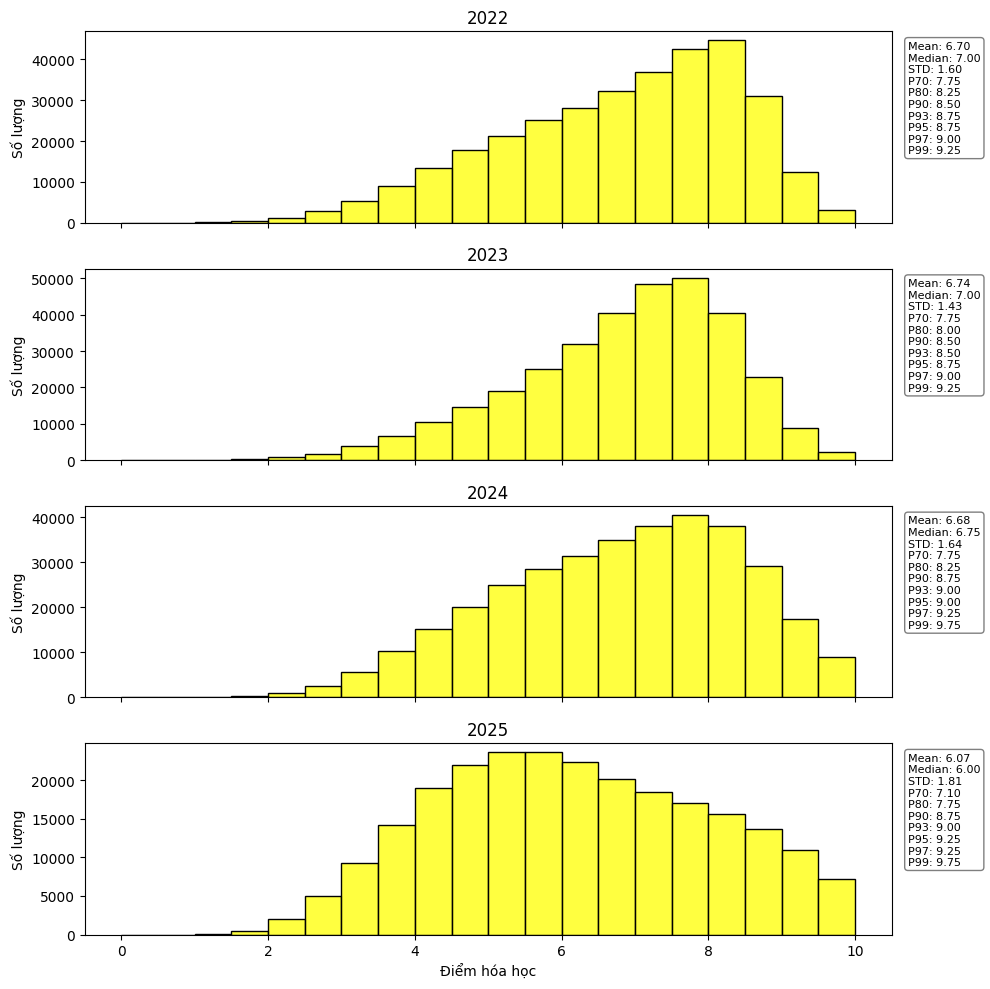

In [28]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm hóa trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['hoa_hoc'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'yellow')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm hóa học')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['hoa_hoc'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

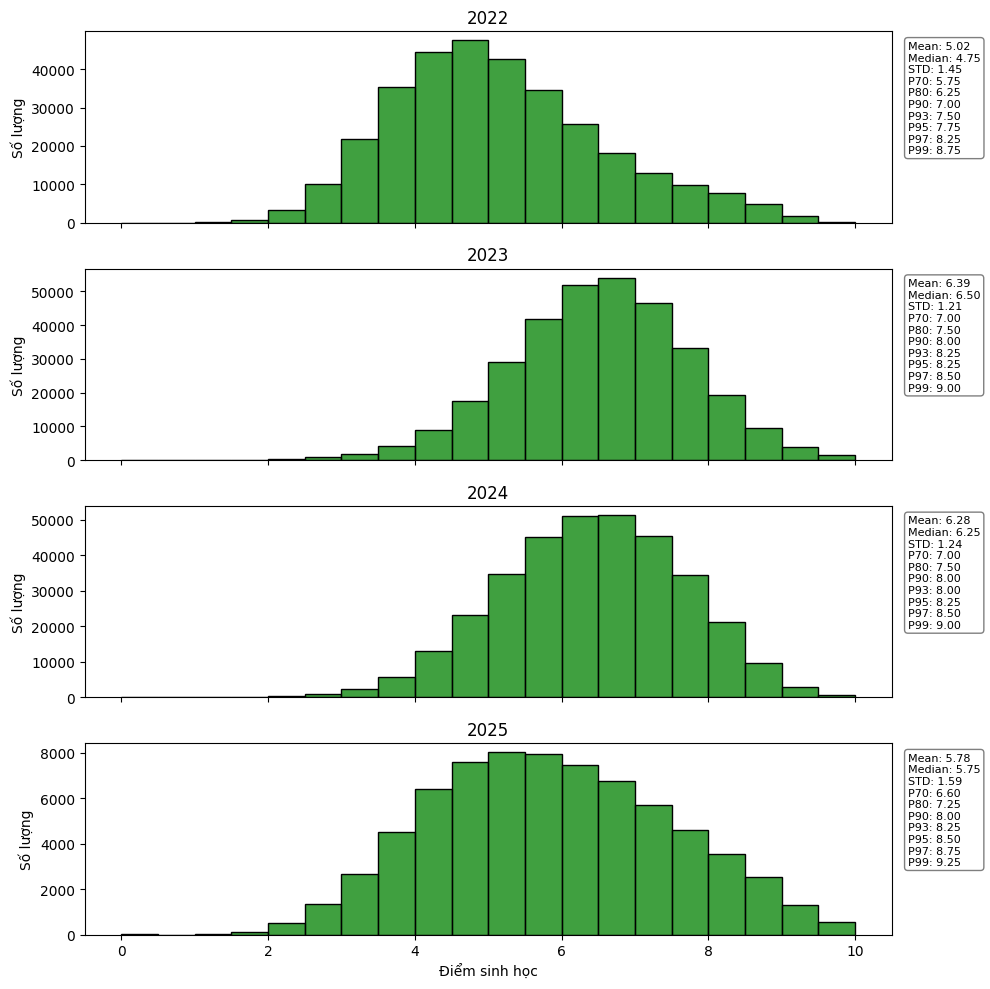

In [29]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm sinh trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['sinh_hoc'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'green')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm sinh học')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['sinh_hoc'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

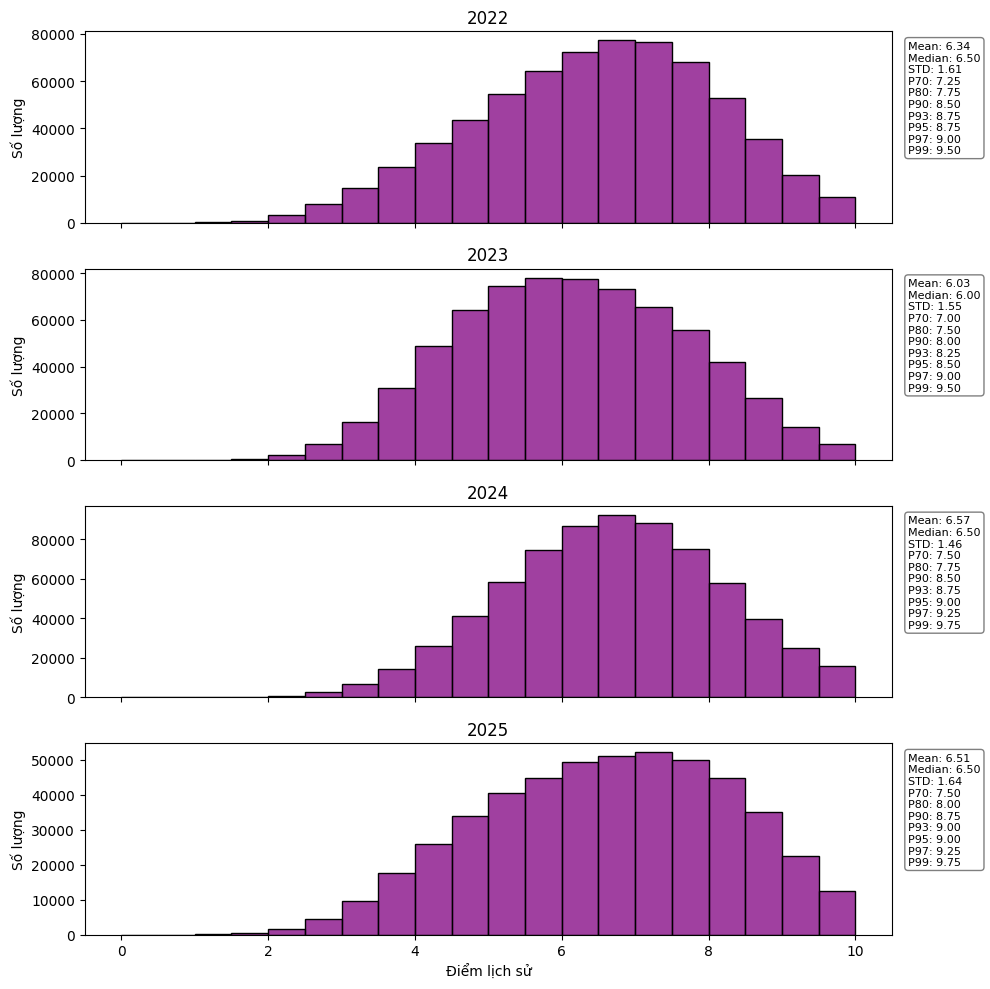

In [30]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm sử trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['lich_su'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'purple')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm lịch sử')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['lich_su'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

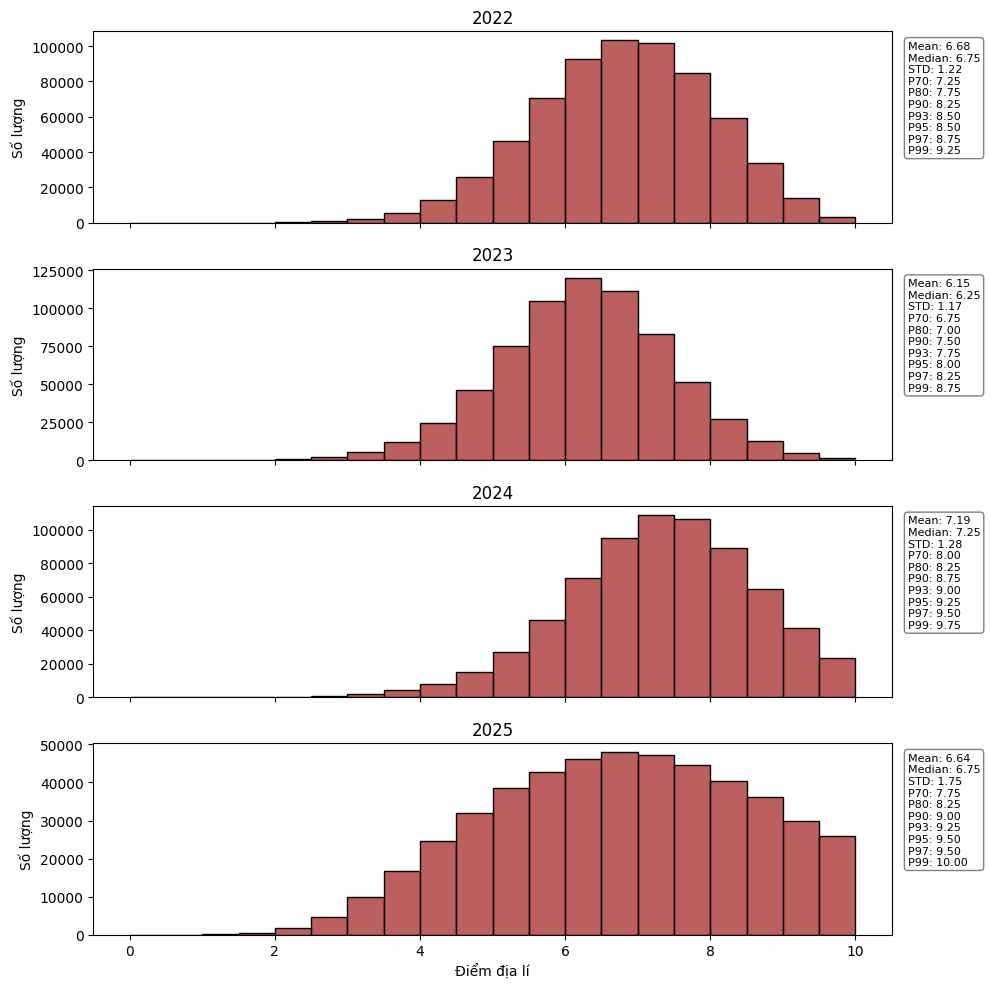

In [31]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm địa trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['dia_li'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'brown')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm địa lí')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['dia_li'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

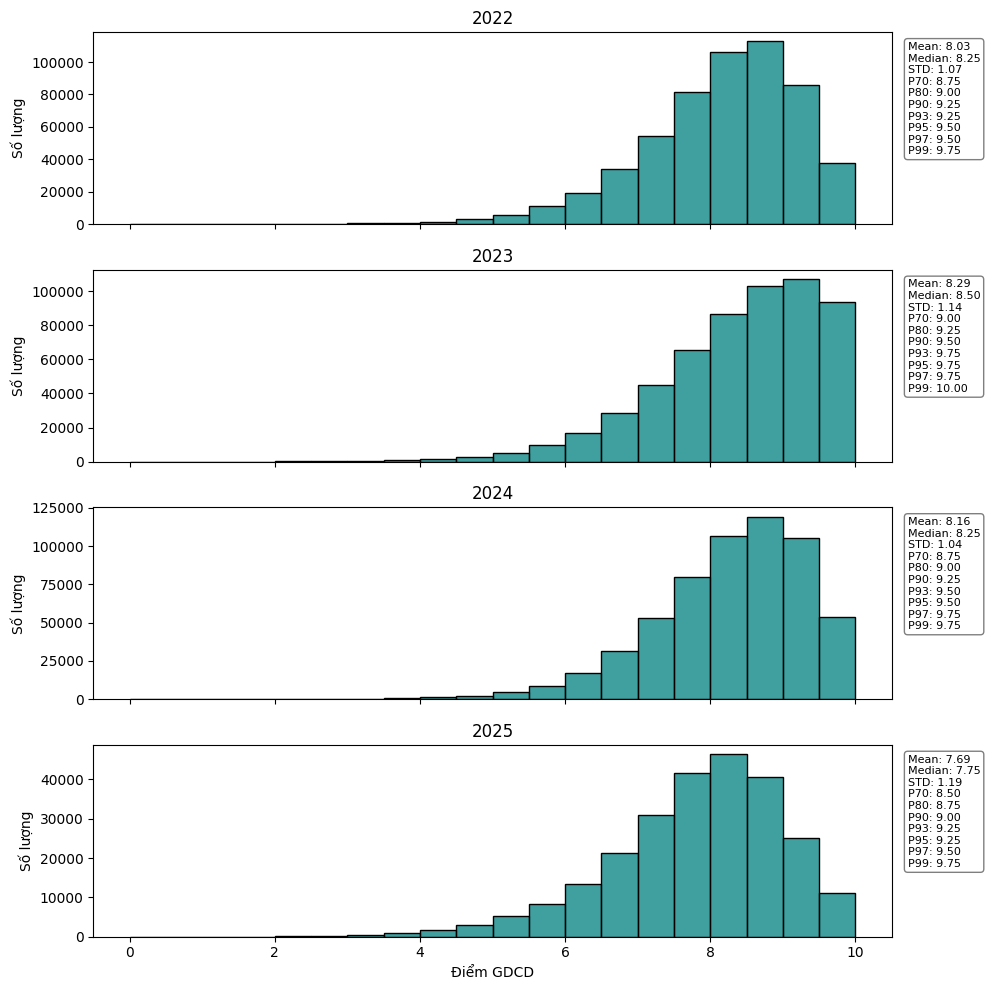

In [32]:
data = df_all

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 11, 1))

#tạo histogram cho điểm gdcd trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['gdcd'], bins = 20, kde = False, ax = ax[i], edgecolor = 'black', color = 'teal')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm GDCD')
    ax[i].set_ylabel('Số lượng')

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['gdcd'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

#### **Compare with previous years**

In [33]:
sample_data = df_all.sample(frac = 0.3, random_state = 1)

In [34]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1269700 entries, 601453 to 3263676
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   sbd           1269700 non-null  int64  
 1   toan          1250641 non-null  float64
 2   ngu_van       1254987 non-null  float64
 3   ngoai_ngu     908476 non-null   float64
 4   vat_li        404928 non-null   float64
 5   hoa_hoc       373665 non-null   float64
 6   sinh_hoc      318044 non-null   float64
 7   lich_su       763144 non-null   float64
 8   dia_li        759871 non-null   float64
 9   gdcd          586788 non-null   float64
 10  ma_ngoai_ngu  647547 non-null   object 
 11  year          1269700 non-null  int64  
 12  province      1269700 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 135.6+ MB


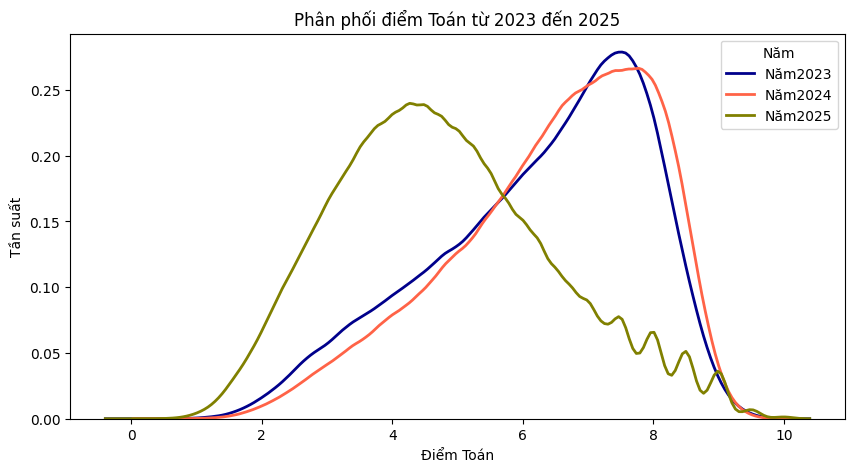

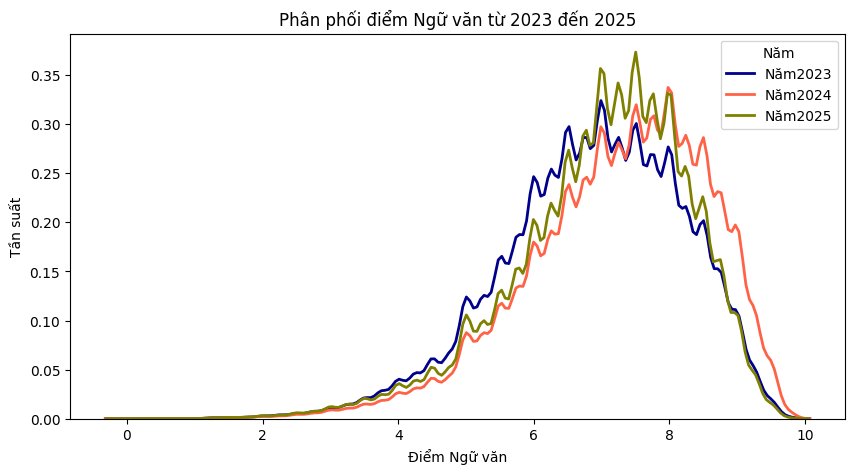

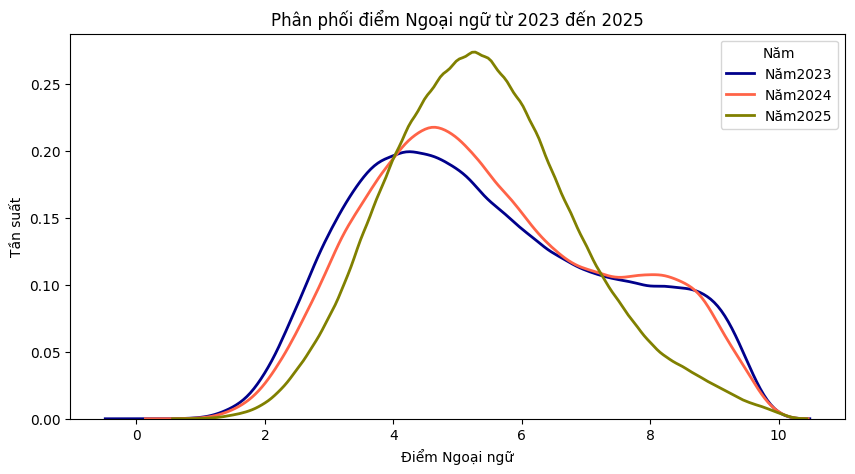

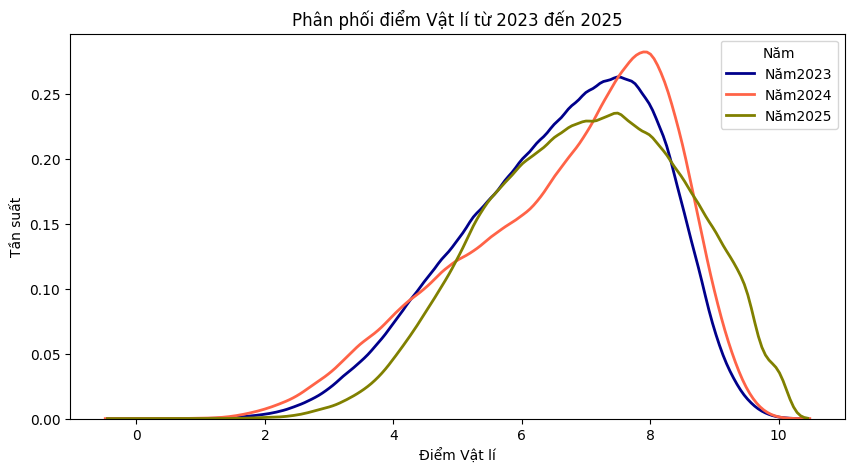

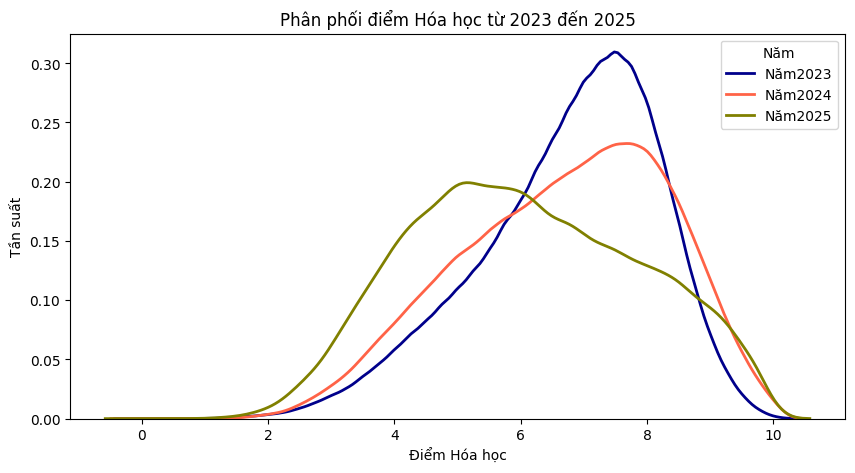

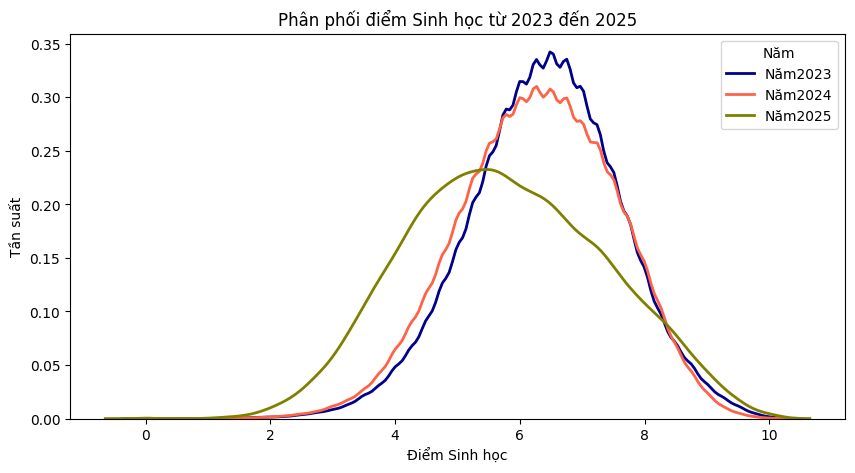

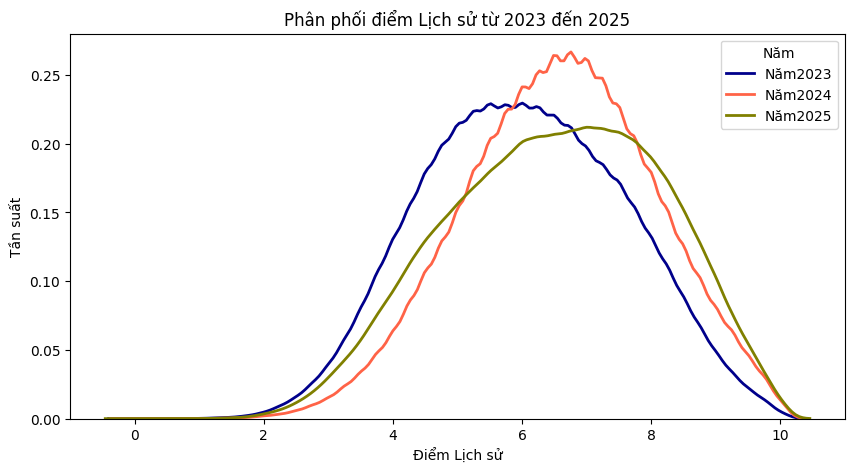

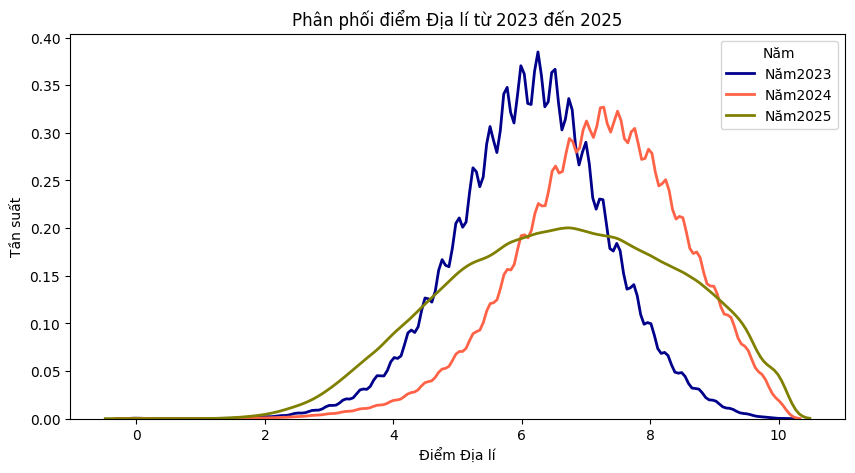

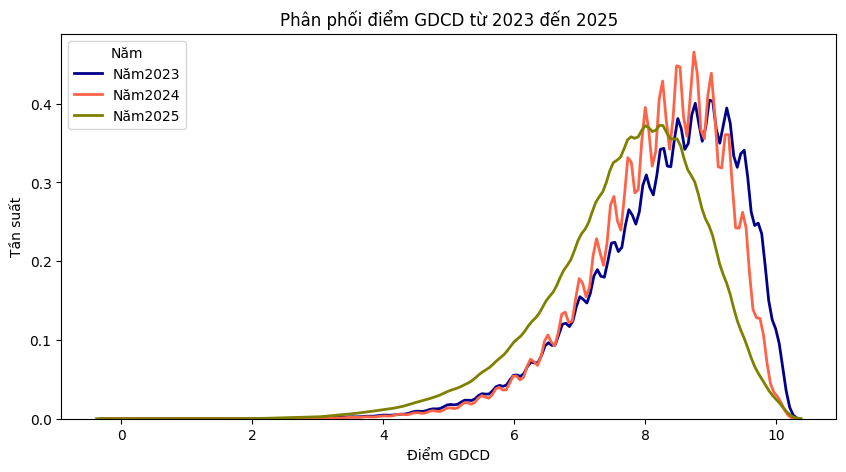

In [35]:
#lọc dữ liệu từ các năm 2023-2025
df_filtered = sample_data[(sample_data['year'].isin([2022, 2023, 2024, 2025]))]

#các môn học cần phân tích
subjects = ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']
titles = ['Toán', 'Ngữ văn', 'Ngoại ngữ', 'Vật lí', 'Hóa học', 'Sinh học', 'Lịch sử', 'Địa lí', 'GDCD']
colors = ['darkblue', 'tomato', 'olive']

#vẽ histogram cho từng môn học
for i, subject in enumerate(subjects):
    plt.figure(figsize=(10, 5))
    for year, color in zip([2023, 2024, 2025], colors):
        subject_data = df_filtered[df_filtered['year'] == year][subject].dropna()
        sns.kdeplot(data = subject_data, color = color, label = f'Năm{year}', linewidth = 2)

    plt.title(f'Phân phối điểm {titles[i]} từ 2023 đến 2025')
    plt.xlabel(f'Điểm {titles[i]}')
    plt.ylabel('Tần suất')
    plt.legend(title = 'Năm')
    plt.grid(False)
    plt.show()

## **3.2. Group distribution**

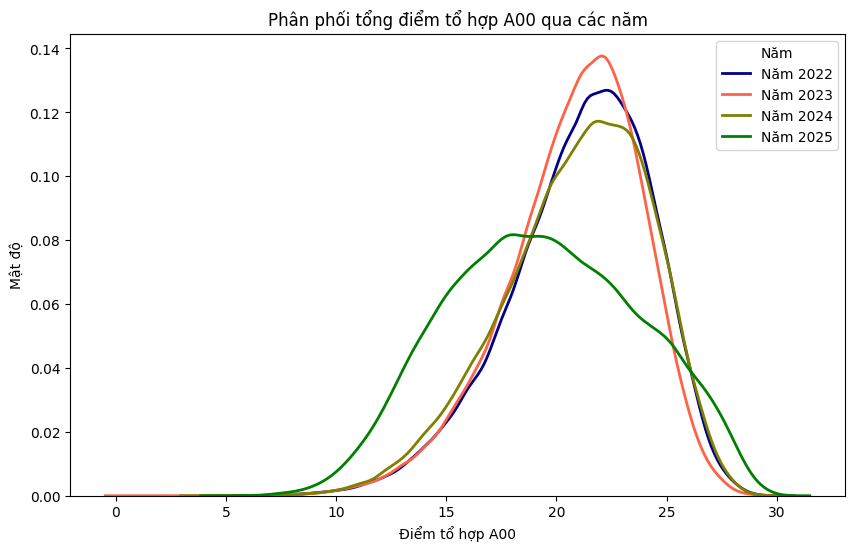

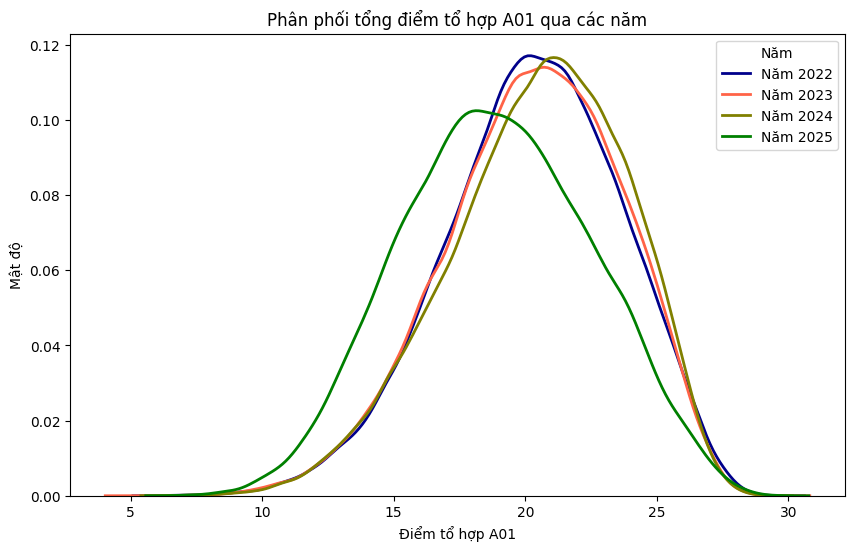

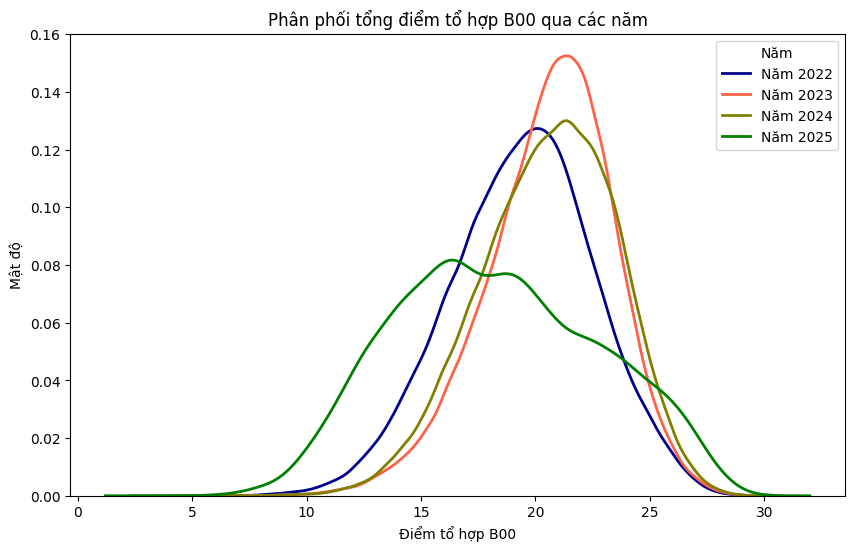

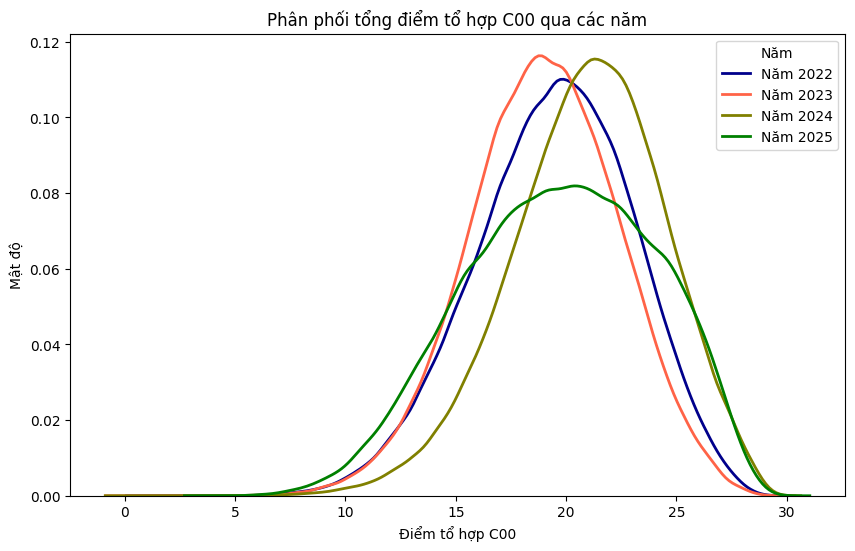

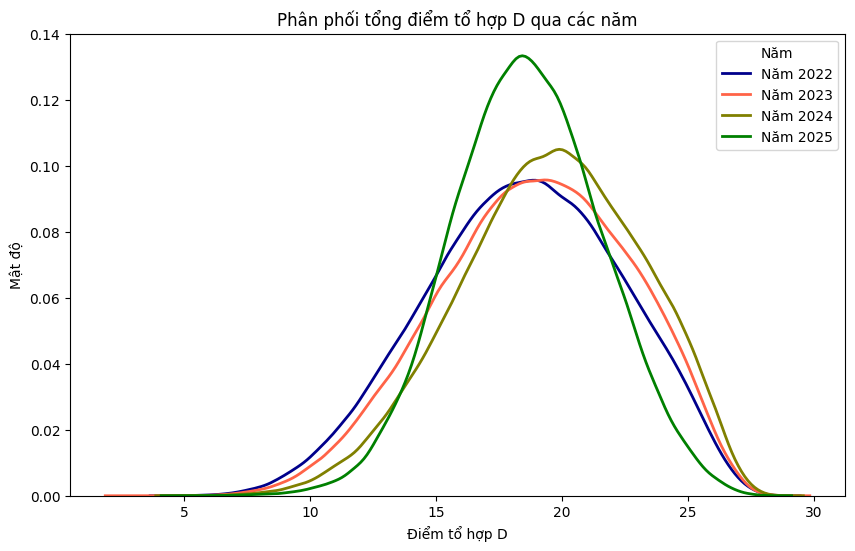

In [36]:
#tạo cột tổng điểm cho từng tổ hợp môn
df_filtered['A00'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
df_filtered['A01'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']
df_filtered['B00'] = df_filtered['toan'] + df_filtered['sinh_hoc'] + df_filtered['hoa_hoc']
df_filtered['C00'] = df_filtered['ngu_van'] + df_filtered['lich_su'] + df_filtered['dia_li']
df_filtered['D'] = df_filtered['toan'] + df_filtered['ngu_van'] + df_filtered['ngoai_ngu']

#các tổ hợp cần phân tích
combinations = ['A00', 'A01', 'B00', 'C00', 'D']
colors = ['darkblue', 'tomato', 'olive', 'green']

#vẽ histogram cho từng tổ hợp môn
for combination in combinations:
    plt.figure(figsize=(10, 6))

    # Vòng lặp phụ: Trong mỗi biểu đồ, lặp qua từng năm để vẽ đường cong
    for year, color in zip([2022, 2023, 2024, 2025], colors):
        # Lọc dữ liệu cho năm và tổ hợp môn hiện tại
        data_to_plot = df_filtered[df_filtered['year'] == year][combination].dropna()

        # Vẽ biểu đồ KDE
        sns.kdeplot(data=data_to_plot, label=f'Năm {year}', linewidth=2, color=color)

    # Cài đặt tiêu đề, nhãn và chú thích cho biểu đồ
    plt.title(f'Phân phối tổng điểm tổ hợp {combination} qua các năm')
    plt.xlabel(f'Điểm tổ hợp {combination}')
    plt.ylabel('Mật độ')
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

### **a. Group A00**

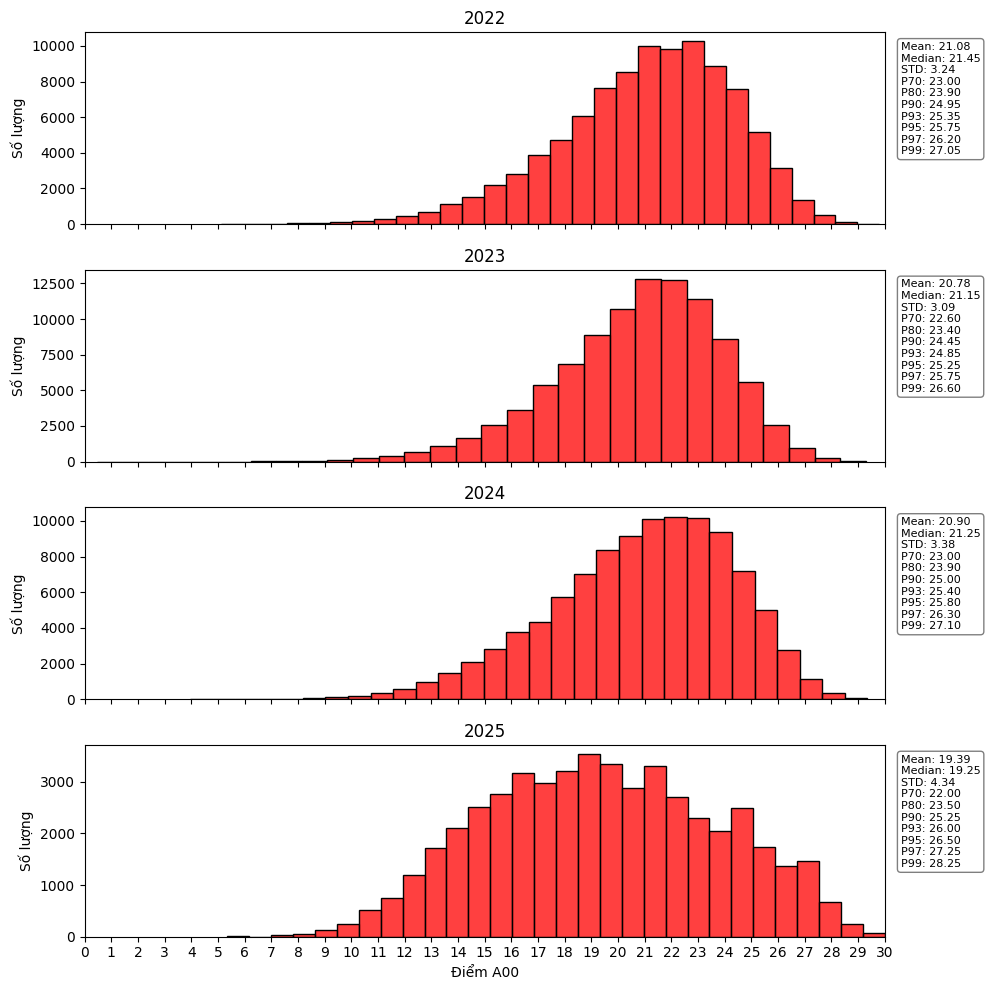

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

df_filtered['A00'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['hoa_hoc']
df_filtered['A01'] = df_filtered['toan'] + df_filtered['vat_li'] + df_filtered['ngoai_ngu']
df_filtered['B00'] = df_filtered['toan'] + df_filtered['sinh_hoc'] + df_filtered['hoa_hoc']
df_filtered['C00'] = df_filtered['ngu_van'] + df_filtered['lich_su'] + df_filtered['dia_li']
df_filtered['D'] = df_filtered['toan'] + df_filtered['ngu_van'] + df_filtered['ngoai_ngu']
data = df_filtered

# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 31, 1))

#tạo histogram cho khối A00 trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['A00'], bins = 30, kde = False, ax = ax[i], edgecolor = 'black', color = 'red')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm A00')
    ax[i].set_ylabel('Số lượng')

# Giới hạn trục x và đặt step = 1
    ax[i].set_xlim(0, 30)
    ax[i].xaxis.set_major_locator(MultipleLocator(1))

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['A00'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

Sự chênh lệch trung bình số học sinh giữa năm 2024 và 2025 là: -2094.33
Khoảng tin cậy cho sự chênh lệch trung bình là: (np.float64(-3220.8691246503304), np.float64(-967.7975420163366))


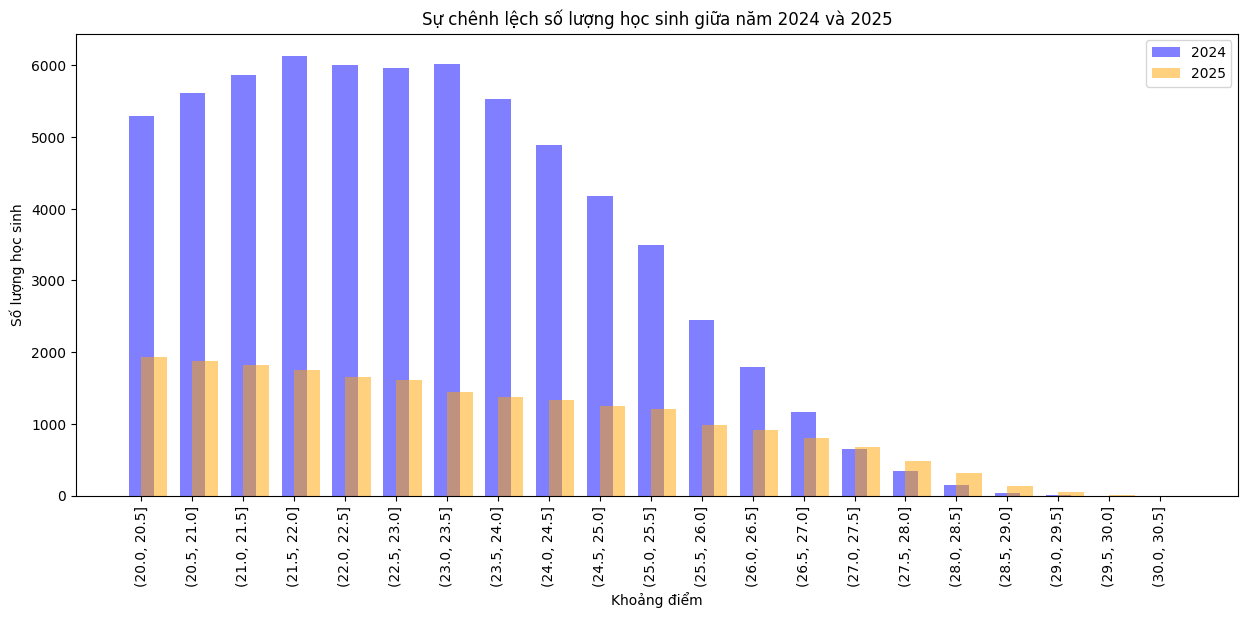

In [38]:
#ước lượng
from scipy import stats

#lựa chọn tổ hợp cần phân tích
combination = 'A00'

#chia khung điểm từ 20 đến 30, mỗi khoảng 1 điểm
bins = np.arange(20, 31, 0.5)

#lọc dữ liệu cho các năm 2024, 2025
df_2024 = df_filtered[df_filtered['year'] == 2024]
df_2025 = df_filtered[df_filtered['year'] == 2025]

#tạo bảng điểm số lượng học sinh trong mỗi khung điểm từng năm
df_2024_counts = pd.cut(df_2024[combination], bins=bins).value_counts().sort_index()
df_2025_counts = pd.cut(df_2025[combination], bins=bins).value_counts().sort_index()

#tính toán sự chênh lệch trung bình số học sinh và khoảng tin cậy
mean_diff = df_2025_counts.mean() - df_2024_counts.mean()
std_diff = np.sqrt(df_2025_counts.var() + df_2024_counts.var())
confidence_interval = stats.norm.interval(0.95, loc=mean_diff, scale=std_diff/np.sqrt(len(df_2025_counts)))

#hiển thị kết quả
print(f'Sự chênh lệch trung bình số học sinh giữa năm 2024 và 2025 là: {mean_diff:.2f}')
print(f'Khoảng tin cậy cho sự chênh lệch trung bình là: {confidence_interval}')

#vẽ biểu đồ so sánh số lượng mỗi học sinh trong mỗi khung điểm từng năm
plt.figure(figsize=(15, 6))
plt.bar(df_2024_counts.index.astype(str), df_2024_counts.values, width=0.5, alpha=0.5, align='center', label='2024', color='blue')
plt.bar(df_2025_counts.index.astype(str), df_2025_counts.values, width=0.5, alpha=0.5, align='edge', label='2025', color='orange')
plt.xlabel('Khoảng điểm')
plt.ylabel('Số lượng học sinh')
plt.title(f'Sự chênh lệch số lượng học sinh giữa năm 2024 và 2025')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### **b. Group A01**

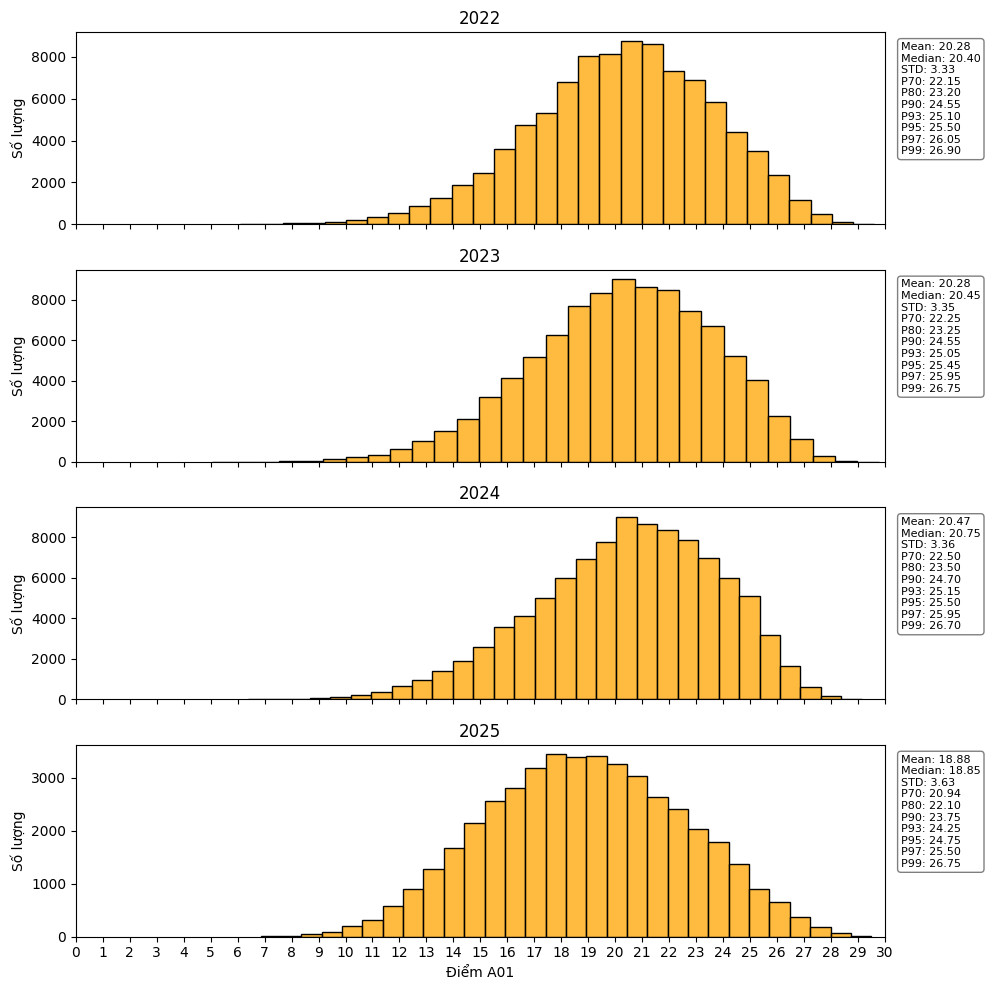

In [39]:
# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 31, 1))

#tạo histogram cho khối A00 trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['A01'], bins = 30, kde = False, ax = ax[i], edgecolor = 'black', color = 'orange')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm A01')
    ax[i].set_ylabel('Số lượng')

# Giới hạn trục x và đặt step = 1
    ax[i].set_xlim(0, 30)
    ax[i].xaxis.set_major_locator(MultipleLocator(1))

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['A01'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### **c. Group B00**

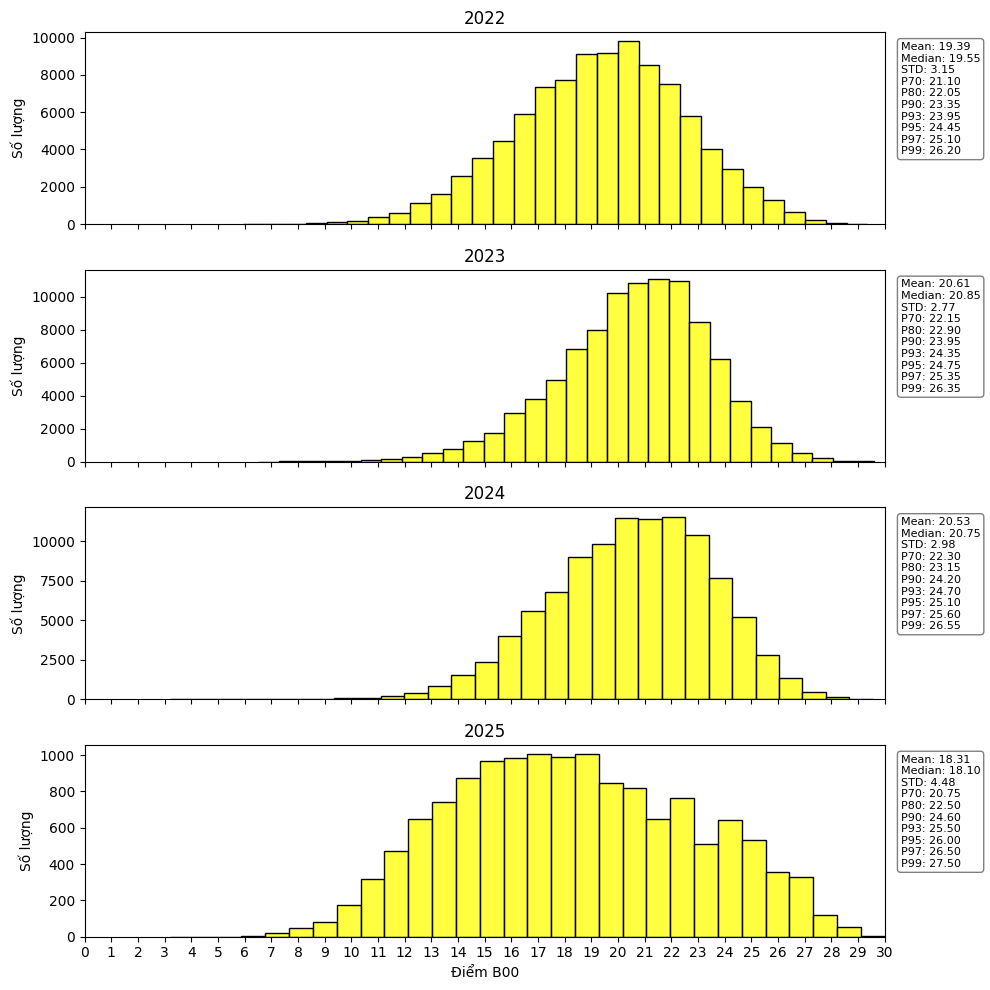

In [40]:
# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 31, 1))

#tạo histogram cho khối A00 trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['B00'], bins = 30, kde = False, ax = ax[i], edgecolor = 'black', color = 'yellow')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm B00')
    ax[i].set_ylabel('Số lượng')

# Giới hạn trục x và đặt step = 1
    ax[i].set_xlim(0, 30)
    ax[i].xaxis.set_major_locator(MultipleLocator(1))

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['B00'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### **d. Group C00**

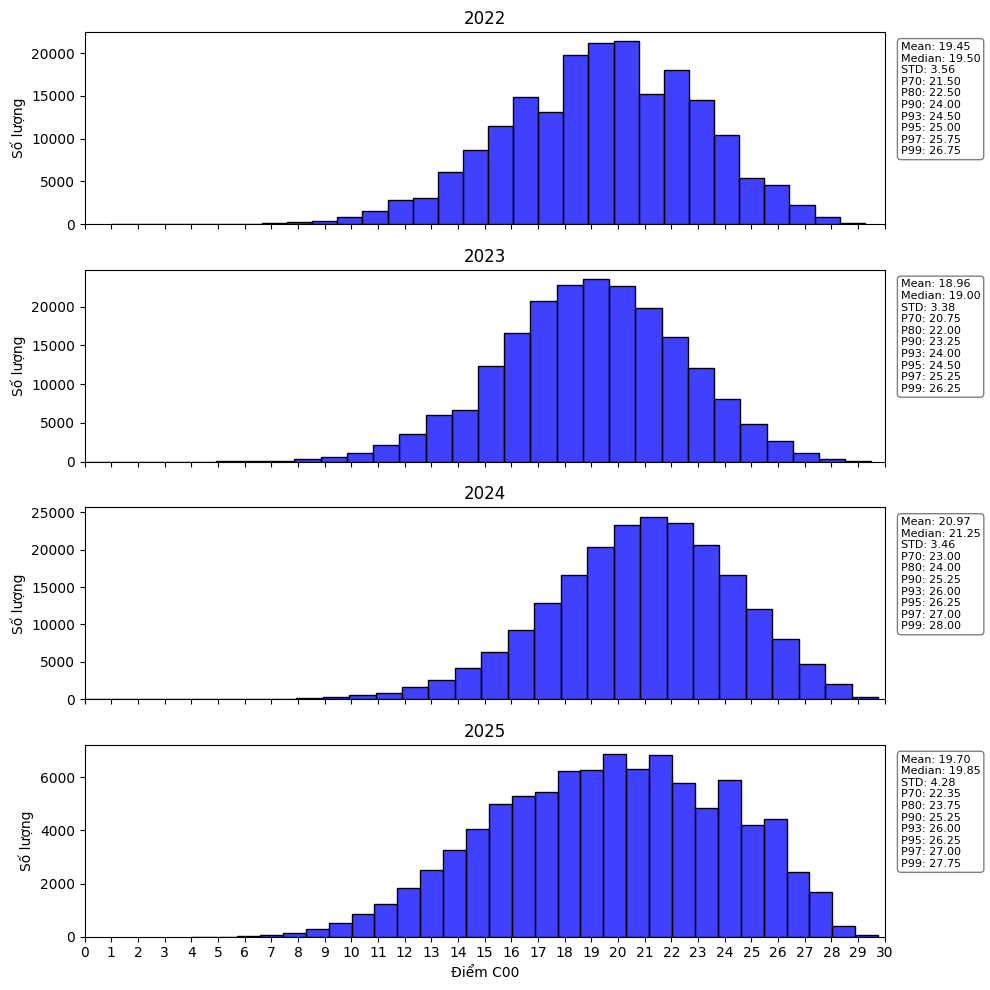

In [41]:
# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 31, 1))

#tạo histogram cho khối A00 trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 10), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['C00'], bins = 30, kde = False, ax = ax[i], edgecolor = 'black', color = 'blue')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm C00')
    ax[i].set_ylabel('Số lượng')

# Giới hạn trục x và đặt step = 1
    ax[i].set_xlim(0, 30)
    ax[i].xaxis.set_major_locator(MultipleLocator(1))

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['C00'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### **e. Group D**

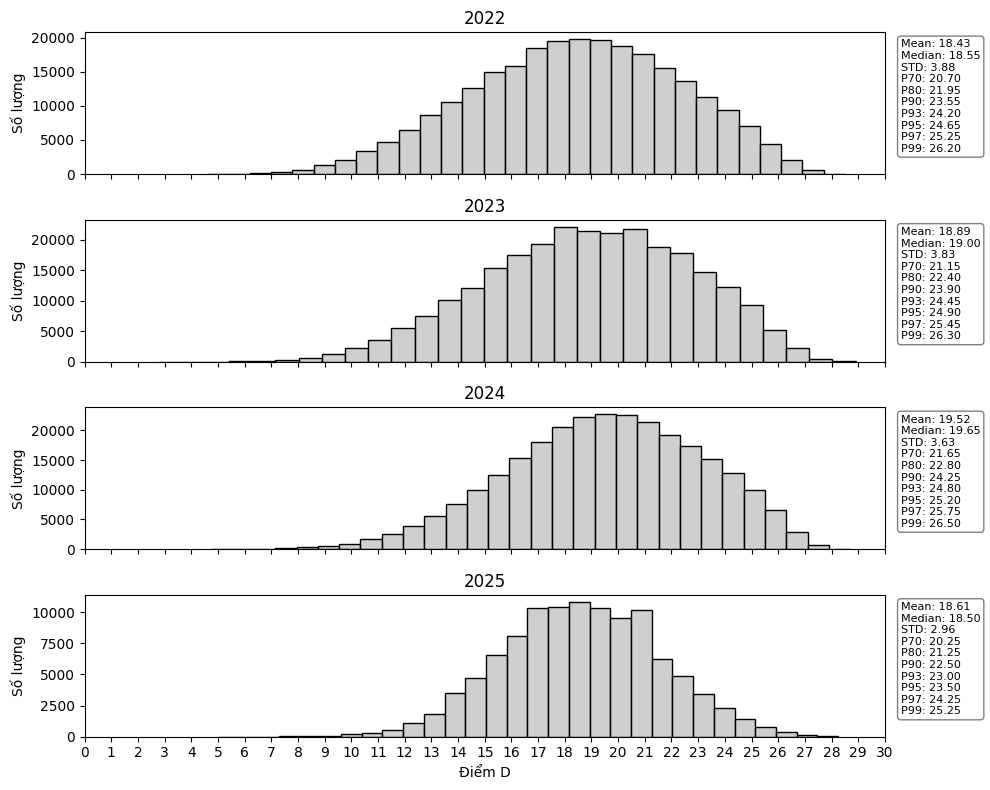

In [42]:
# Chuyển đổi cột 'year' sang dạng số
data['year'] = data['year'].astype(int)

#lọc dữ liệu cho 4 năm gần đây
recent_years = data[data['year'].isin(data['year'].unique()[-4:])]
score = list(range(0, 30, 1))

#tạo histogram cho khối A00 trong 4 năm gần đây, sắp xếp theo dạng 1 cột 4 hàng
fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharex = True)

#các năm gần đây được sắp xếp theo thứ tự tăng dần
recent_years_sorted = sorted(recent_years['year'].unique())

#vẽ histogram cho từng năm
for i, year in enumerate(recent_years_sorted):
    sns.histplot(recent_years[recent_years['year'] == year]['D'], bins = 30, kde = False, ax = ax[i], edgecolor = 'black', color = 'silver')
    ax[i].set_title(f'{year}')
    ax[i].set_xlabel('Điểm D')
    ax[i].set_ylabel('Số lượng')

# Giới hạn trục x và đặt step = 1
    ax[i].set_xlim(0, 30)
    ax[i].xaxis.set_major_locator(MultipleLocator(1))

    #tính toán các thông tin thống kê
    year_data = recent_years[recent_years['year'] == year]['D'].dropna()
    mean = year_data.mean()
    median = year_data.median()
    std = year_data.std()
    p70 = year_data.quantile(0.70)
    p80 = year_data.quantile(0.80)
    p90 = year_data.quantile(0.90)
    p93 = year_data.quantile(0.93)
    p95 = year_data.quantile(0.95)
    p97 = year_data.quantile(0.97)
    p99 = year_data.quantile(0.99)

    # Tạo chuỗi văn bản để hiển thị, sử dụng f-string và định dạng làm tròn 2 chữ số thập phân
    stats_text = (f'Mean: {mean:.2f}\n'
                  f'Median: {median:.2f}\n'
                  f'STD: {std:.2f}\n'
                  f'P70: {p70:.2f}\n'
                  f'P80: {p80:.2f}\n'
                  f'P90: {p90:.2f}\n'
                  f'P93: {p93:.2f}\n'
                  f'P95: {p95:.2f}\n'
                  f'P97: {p97:.2f}\n'
                  f'P99: {p99:.2f}')

    # Hiển thị văn bản trên biểu đồ
    ax[i].text(1.02, 0.95, stats_text,
               transform=ax[i].transAxes,
               fontsize=8,
               verticalalignment='top',
               horizontalalignment='left',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

In [43]:
## PERCENTILE
#các tổ hợp môn cần phân tích
combinations = ['A00', 'A01', 'B00', 'C00', 'D']

#các percentile cần tính toán
percentiles = list(range(70, 101, 2))

#tạo dataframe để lưu kết quả
percentiles_df = pd.DataFrame(index=percentiles)

#tính toán các chỉ số percentile
for combination in combinations:
    for year in [2023, 2024, 2025]:
        year_data = df_filtered[df_filtered['year'] == year][combination].dropna()
        percentile_value = np.percentile(year_data, percentiles)
        percentiles_df[f'{combination}_{year}'] = percentile_value

#hiển thị kết quả dưới dạng bảng
percentiles_df = percentiles_df.T
percentiles_df.index.name = 'Combination_Year'
percentiles_df

70     72     74     76     78     80     82     84   \
Combination_Year                                                            
A00_2023          22.600  22.75  22.90  23.05  23.25  23.40  23.60  23.75   
A00_2024          23.000  23.15  23.35  23.50  23.70  23.90  24.05  24.25   
A00_2025          22.000  22.25  22.50  22.75  23.10  23.50  23.75  24.25   
A01_2023          22.250  22.45  22.65  22.85  23.05  23.25  23.50  23.75   
A01_2024          22.500  22.70  22.85  23.05  23.25  23.50  23.70  23.90   
A01_2025          20.945  21.10  21.35  21.60  21.85  22.10  22.50  22.75   
B00_2023          22.150  22.30  22.45  22.60  22.75  22.90  23.10  23.25   
B00_2024          22.300  22.45  22.60  22.80  22.95  23.15  23.35  23.55   
B00_2025          20.750  21.10  21.50  21.85  22.25  22.50  23.00  23.35   
C00_2023          20.750  21.00  21.25  21.50  21.75  22.00  22.00  22.50   
C00_2024          23.000  23.00  23.25  23.50  23.75  24.00  24.25  24.50   
C00_2025          22.350  22.60  22.85  23.20  23.50  23.75  24.00  24.25   
D_2023            21.150  21.40  21.65  21.90  22.15  22.40  22.65  22.95   
D_2024            21.650  21.85  22.10  22.30  22.55  22.80  23.10  23.35   
D_2025            20.250  20.25  20.50  20.75  21.00  21.25  21.35  21.60   

                    86     88     90     92     94     96     98     100  
Combination_Year                                                          
A00_2023          24.00  24.20  24.45  24.70  25.05  25.45  26.10  29.30  
A00_2024          24.50  24.70  25.00  25.25  25.60  26.00  26.60  29.35  
A00_2025          24.50  25.00  25.25  25.75  26.25  27.00  27.50  30.00  
A01_2023          24.00  24.25  24.55  24.85  25.20  25.65  26.25  29.80  
A01_2024          24.15  24.40  24.70  25.00  25.30  25.70  26.25  29.15  
A01_2025          23.00  23.35  23.75  24.10  24.50  25.25  26.00  29.50  
B00_2023          23.45  23.70  23.95  24.20  24.55  25.05  25.70  29.60  
B00_2024          23.75  23.95  24.20  24.55  24.85  25.35  25.95  29.55  
B00_2025          23.75  24.25  24.60  25.25  25.75  26.25  27.00  30.00  
C00_2023          22.75  23.00  23.25  23.75  24.25  24.75  25.75  29.50  
C00_2024          24.75  25.00  25.25  25.75  26.25  26.75  27.50  29.75  
C00_2025          24.75  25.00  25.25  25.75  26.25  26.50  27.25  29.75  
D_2023            23.25  23.55  23.90  24.25  24.65  25.15  25.80  28.90  
D_2024            23.65  23.95  24.25  24.60  25.00  25.45  26.05  28.70  
D_2025            21.85  22.25  22.50  22.75  23.25  23.75  24.60  28.25

### **Correlation**

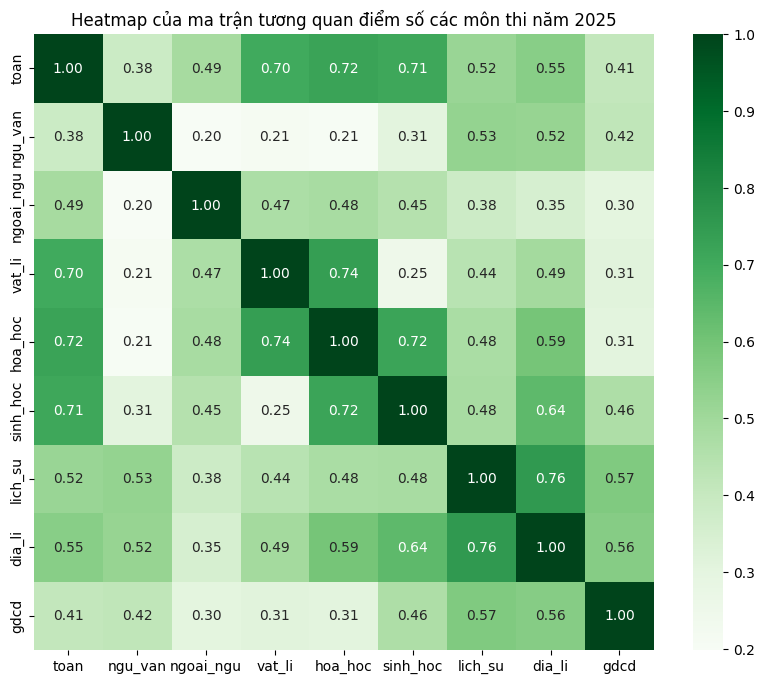

In [44]:
#lọc dữ liệu cho năm 2025
df_2025 = df_all[df_all['year'] == 2025]

#chọn các cột điểm số của các môn học
score_columns = df_2025[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]

#tính toán ma trận tương quan
correlation_matrix = score_columns.corr()

#vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Heatmap của ma trận tương quan điểm số các môn thi năm 2025')
plt.show()

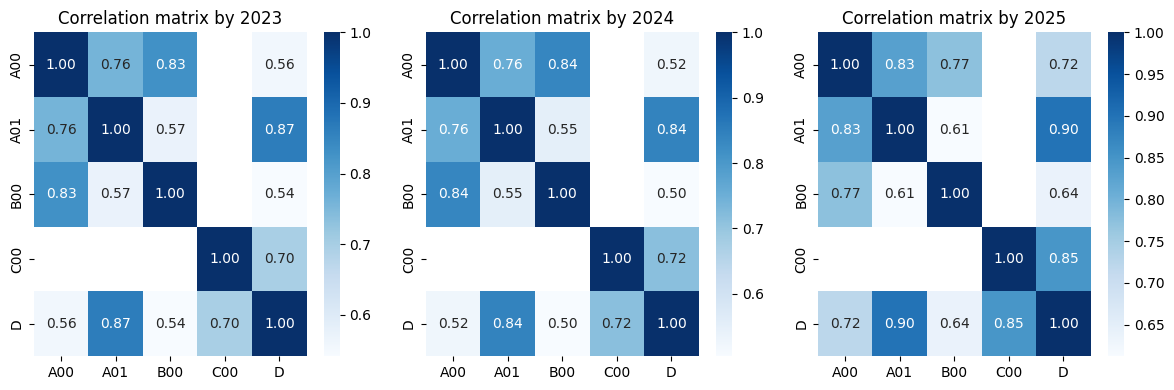

In [45]:
#danh sách các năm cần phân tích
years = [2023, 2024, 2025]

#tạo figures để chứa các heatmap
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax = ax.flatten()

#vẽ heatmap cho từng năm
for i, year in enumerate(years):
    df_year = df_filtered[df_filtered['year'] == year]
    score_columns = df_year[['A00', 'A01', 'B00', 'C00', 'D']]
    correlation_matrix = score_columns.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", ax=ax[i])
    ax[i].set_title(f'Correlation matrix by {year}')

#điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

## **3.3. Location**

In [46]:
# Khai báo các vùng theo list tỉnh
north_mountains = [
    'Hà Giang','Cao Bằng','Bắc Kạn','Tuyên Quang','Lào Cai','Yên Bái',
    'Thái Nguyên','Lạng Sơn','Bắc Giang','Phú Thọ','Điện Biên','Lai Châu',
    'Sơn La','Hoà Bình'
]

red_river_delta = [
    'Hà Nội','Hải Phòng','Vĩnh Phúc','Bắc Ninh','Quảng Ninh',
    'Hải Dương','Hưng Yên','Thái Bình','Hà Nam','Nam Định','Ninh Bình'
]

north_central_coast = [
    'Thanh Hóa','Nghệ An','Hà Tĩnh','Quảng Bình','Quảng Trị','Thừa Thiên Huế'
]

central_highlands = [
    'Kon Tum','Gia Lai','Đắk Lắk','Đắk Nông','Lâm Đồng'
]

southeast = [
    'Bình Phước','Tây Ninh','Bình Dương','Đồng Nai','Bà Rịa - Vũng Tàu','TP. Hồ Chí Minh'
]

mekong_delta = [
    'Long An','Tiền Giang','Bến Tre','Trà Vinh','Vĩnh Long','Đồng Tháp',
    'An Giang','Kiên Giang','Cần Thơ','Hậu Giang','Sóc Trăng','Bạc Liêu','Cà Mau'
]

south_central_coast = [
    'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định',
    'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận'
]

# Hàm map tỉnh -> vùng
def map_region(province):
    if province in north_mountains:
        return 'Trung du và miền núi phía Bắc'
    elif province in red_river_delta:
        return 'Đồng bằng sông Hồng'
    elif province in north_central_coast:
        return 'Bắc Trung Bộ'
    elif province in central_highlands:
        return 'Tây Nguyên'
    elif province in southeast:
        return 'Đông Nam Bộ'
    elif province in mekong_delta:
        return 'Đồng bằng sông Cửu Long'
    elif province in south_central_coast:
        return 'Duyên hải Nam Trung Bộ'
    else:
        return 'Không xác định'

# Tạo cột region
df_all['region'] = df_all['province'].apply(map_region)


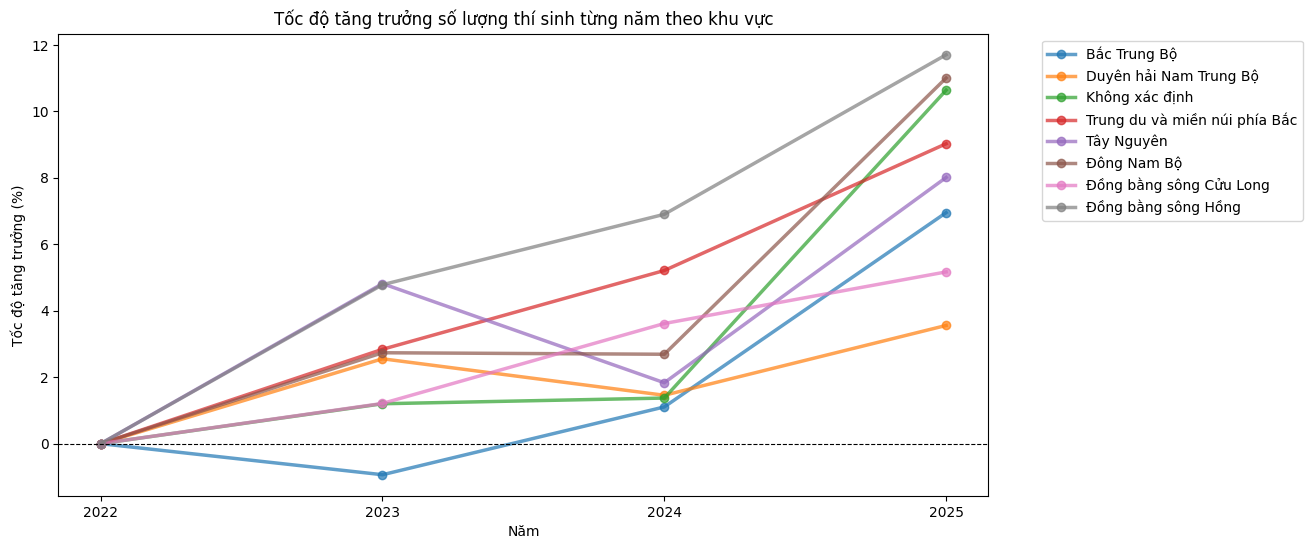

In [47]:
# Tính số lượng thí sinh mỗi vùng của từng năm
students_per_year_region = df_all.groupby(['year', 'region']).size().unstack()

# Tính tốc độ tăng trưởng so với năm trước (%)
growth_rate_region = students_per_year_region.pct_change() * 100

# Thêm dòng năm 2022 = 0 để làm mốc
growth_rate_region.loc[2022] = 0

# Sắp xếp lại index để 2022 nằm đúng vị trí
growth_rate_region = growth_rate_region.sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))

for region in growth_rate_region.columns:
    x = growth_rate_region.index
    y = growth_rate_region[region]
    plt.plot(x, y, label=region, linewidth=2.5, alpha=0.7, marker='o')

plt.title('Tốc độ tăng trưởng số lượng thí sinh từng năm theo khu vực')
plt.ylabel('Tốc độ tăng trưởng (%)')
plt.xlabel('Năm')
plt.xticks(x)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # đường 0% tham chiếu
plt.show()


<Figure size 1200x600 with 0 Axes>

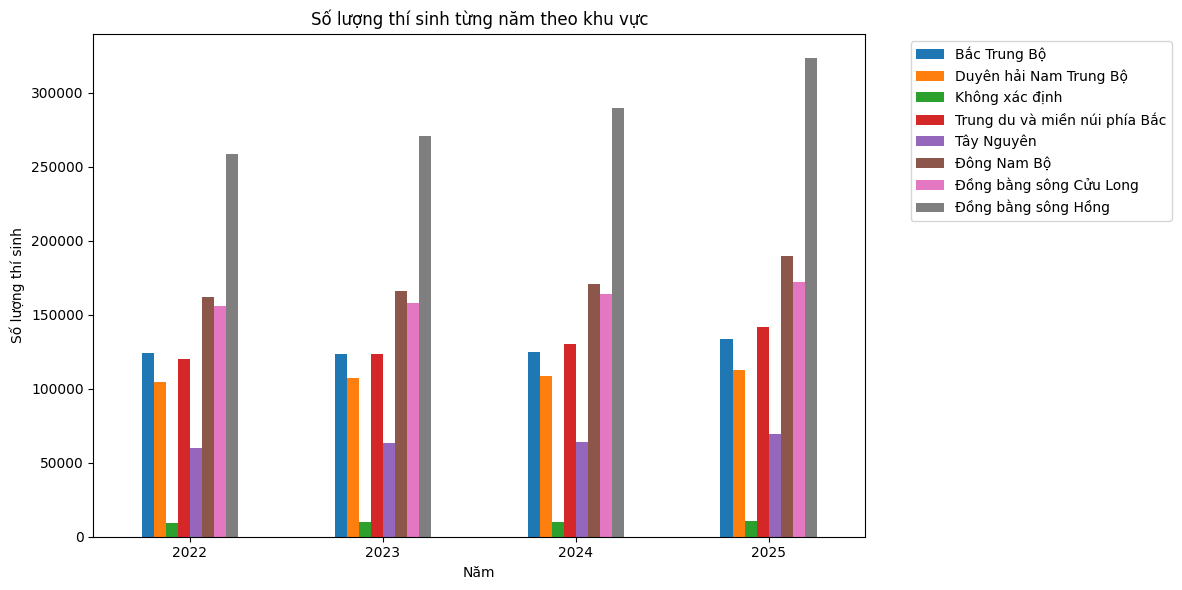

In [48]:
#tính toán số lượng thí sinh từng năm
students_per_year_region = df_all.groupby(['year', 'region']).size().unstack()

#vẽ biểu đồ cột so sánh số lượng thí sinh từng năm theo khu vực
plt.figure(figsize=(12,6))
students_per_year_region.plot(kind='bar', stacked=False, figsize=(12,6))

plt.title("Số lượng thí sinh từng năm theo khu vực")
plt.xlabel("Năm")
plt.ylabel("Số lượng thí sinh")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **a. Trung du và miền núi phía Bắc**

In [49]:
#lọc dữ liệu theo khu vực Trung du và miền núi phía Bắc
df_region = df_all[df_all['region'] == 'Trung du và miền núi phía Bắc']

#pivot bảng: số lượng thí sinh theo năm và tỉnh
pivot_region = df_region.pivot_table(
    index='province',
    columns='year',
    values='sbd',     # 'sbd' là mã thí sinh duy nhất
    aggfunc='count'
).reset_index()

pivot_region.columns = pivot_region.columns.astype(str)

# thêm cột tỉ lệ tăng giảm nếu các năm tồn tại
for y1, y2 in [(2022, 2023), (2023, 2024), (2024, 2025)]:
    if str(y1) in pivot_region.columns and str(y2) in pivot_region.columns:
        pivot_region[f'diff_{y2}'] = (
            (pivot_region[str(y2)] - pivot_region[str(y1)]) / pivot_region[str(y1)].replace(0, pd.NA)
        )

# hiển thị bảng
styled = (
    pivot_region
    .sort_values(by=pivot_region.columns[-1], ascending=False)  # sắp theo cột cuối cùng
    .style
    .format("{:.0%}", subset=[c for c in pivot_region.columns if "diff" in c]) # format % cho các cột diff
    .background_gradient(cmap="Blues", subset=[c for c in pivot_region.columns if "diff" in c]) # tô màu
)

styled


### **b. Bắc Trung Bộ**

In [50]:
#lọc dữ liệu theo khu vực Bắc Trung Bộ
df_region = df_all[df_all['region'] == 'Bắc Trung Bộ']

#pivot bảng: số lượng thí sinh theo năm và tỉnh
pivot_region = df_region.pivot_table(
    index='province',
    columns='year',
    values='sbd',     # 'sbd' là mã thí sinh duy nhất
    aggfunc='count'
).reset_index()

pivot_region.columns = pivot_region.columns.astype(str)

# thêm cột tỉ lệ tăng giảm nếu các năm tồn tại
for y1, y2 in [(2022, 2023), (2023, 2024), (2024, 2025)]:
    if str(y1) in pivot_region.columns and str(y2) in pivot_region.columns:
        pivot_region[f'diff_{y2}'] = (
            (pivot_region[str(y2)] - pivot_region[str(y1)]) / pivot_region[str(y1)].replace(0, pd.NA)
        )

# hiển thị bảng
styled = (
    pivot_region
    .sort_values(by=pivot_region.columns[-1], ascending=False)  # sắp theo cột cuối cùng
    .style
    .format("{:.0%}", subset=[c for c in pivot_region.columns if "diff" in c]) # format % cho các cột diff
    .background_gradient(cmap="Blues", subset=[c for c in pivot_region.columns if "diff" in c]) # tô màu
)
styled


### **c. Duyên hải Nam Trung Bộ**

In [51]:
#lọc dữ liệu theo khu vực Duyên hải Nam Trung Bộ
df_region = df_all[df_all['region'] == 'Duyên hải Nam Trung Bộ']

#pivot bảng: số lượng thí sinh theo năm và tỉnh
pivot_region = df_region.pivot_table(
    index='province',
    columns='year',
    values='sbd',     # 'sbd' là mã thí sinh duy nhất
    aggfunc='count'
).reset_index()

pivot_region.columns = pivot_region.columns.astype(str)

# thêm cột tỉ lệ tăng giảm nếu các năm tồn tại
for y1, y2 in [(2022, 2023), (2023, 2024), (2024, 2025)]:
    if str(y1) in pivot_region.columns and str(y2) in pivot_region.columns:
        pivot_region[f'diff_{y2}'] = (
            (pivot_region[str(y2)] - pivot_region[str(y1)]) / pivot_region[str(y1)].replace(0, pd.NA)
        )

# hiển thị bảng
styled = (
    pivot_region
    .sort_values(by=pivot_region.columns[-1], ascending=False)  # sắp theo cột cuối cùng
    .style
    .format("{:.0%}", subset=[c for c in pivot_region.columns if "diff" in c]) # format % cho các cột diff
    .background_gradient(cmap="Blues", subset=[c for c in pivot_region.columns if "diff" in c]) # tô màu
)
styled

### **d. Tây Nguyên**

In [52]:
#lọc dữ liệu theo khu vực Tây Nguyên
df_region = df_all[df_all['region'] == 'Tây Nguyên']

#pivot bảng: số lượng thí sinh theo năm và tỉnh
pivot_region = df_region.pivot_table(
    index='province',
    columns='year',
    values='sbd',     # 'sbd' là mã thí sinh duy nhất
    aggfunc='count'
).reset_index()

pivot_region.columns = pivot_region.columns.astype(str)

# thêm cột tỉ lệ tăng giảm nếu các năm tồn tại
for y1, y2 in [(2022, 2023), (2023, 2024), (2024, 2025)]:
    if str(y1) in pivot_region.columns and str(y2) in pivot_region.columns:
        pivot_region[f'diff_{y2}'] = (
            (pivot_region[str(y2)] - pivot_region[str(y1)]) / pivot_region[str(y1)].replace(0, pd.NA)
        )

# hiển thị bảng
styled = (
    pivot_region
    .sort_values(by=pivot_region.columns[-1], ascending=False)  # sắp theo cột cuối cùng
    .style
    .format("{:.0%}", subset=[c for c in pivot_region.columns if "diff" in c]) # format % cho các cột diff
    .background_gradient(cmap="Blues", subset=[c for c in pivot_region.columns if "diff" in c]) # tô màu
)
styled

### **e. Đồng bằng sông Hồng**

In [53]:
#lọc dữ liệu theo khu vực Đồng bằng sông Hồng
df_region = df_all[df_all['region'] == 'Đồng bằng sông Hồng']

#pivot bảng: số lượng thí sinh theo năm và tỉnh
pivot_region = df_region.pivot_table(
    index='province',
    columns='year',
    values='sbd',     # 'sbd' là mã thí sinh duy nhất
    aggfunc='count'
).reset_index()

pivot_region.columns = pivot_region.columns.astype(str)

# thêm cột tỉ lệ tăng giảm nếu các năm tồn tại
for y1, y2 in [(2022, 2023), (2023, 2024), (2024, 2025)]:
    if str(y1) in pivot_region.columns and str(y2) in pivot_region.columns:
        pivot_region[f'diff_{y2}'] = (
            (pivot_region[str(y2)] - pivot_region[str(y1)]) / pivot_region[str(y1)].replace(0, pd.NA)
        )

# hiển thị bảng
styled = (
    pivot_region
    .sort_values(by=pivot_region.columns[-1], ascending=False)  # sắp theo cột cuối cùng
    .style
    .format("{:.0%}", subset=[c for c in pivot_region.columns if "diff" in c]) # format % cho các cột diff
    .background_gradient(cmap="Blues", subset=[c for c in pivot_region.columns if "diff" in c]) # tô màu
)
styled

### **f. Đồng bằng sông Cửu Long**

In [54]:
#lọc dữ liệu theo khu vực Đồng bằng sông Cửu Long
df_region = df_all[df_all['region'] == 'Đồng bằng sông Cửu Long']

#pivot bảng: số lượng thí sinh theo năm và tỉnh
pivot_region = df_region.pivot_table(
    index='province',
    columns='year',
    values='sbd',     # 'sbd' là mã thí sinh duy nhất
    aggfunc='count'
).reset_index()

pivot_region.columns = pivot_region.columns.astype(str)

# thêm cột tỉ lệ tăng giảm nếu các năm tồn tại
for y1, y2 in [(2022, 2023), (2023, 2024), (2024, 2025)]:
    if str(y1) in pivot_region.columns and str(y2) in pivot_region.columns:
        pivot_region[f'diff_{y2}'] = (
            (pivot_region[str(y2)] - pivot_region[str(y1)]) / pivot_region[str(y1)].replace(0, pd.NA)
        )

# hiển thị bảng
styled = (
    pivot_region
    .sort_values(by=pivot_region.columns[-1], ascending=False)  # sắp theo cột cuối cùng
    .style
    .format("{:.0%}", subset=[c for c in pivot_region.columns if "diff" in c]) # format % cho các cột diff
    .background_gradient(cmap="Blues", subset=[c for c in pivot_region.columns if "diff" in c]) # tô màu
)
styled

## **3.4. Map**

In [55]:
import geopandas as gpd
vn_map = gpd.read_file('/content/drive/MyDrive/diemthi_thpt_2020_2024/vnprovinces.geojson')
vn_map['province'] = vn_map['shapeName'].replace({'Bà Rịa–Vũng Tàu': 'Bà Rịa - Vũng Tàu',
                                                  'Hà Nội\t': 'Hà Nội',
                                                  'Ho Chi Minh': 'TP. Hồ Chí Minh'})

In [56]:
data = df_all[df_all['year'] == 2025].copy()

# Tính trung vị điểm toán của từng tỉnh
df_median = df_all.groupby('province')['toan'].median().reset_index()

# Bước 1: Sắp xếp điểm toán theo thứ tự giảm dần trong từng tỉnh
data['rank_toan'] = data.groupby('province')['toan'].rank(ascending=False)

# Bước 2: Đếm tổng số thí sinh trong mỗi tỉnh để xác định ngưỡng 5%
total_students = data.groupby('province')['sbd'].count().reset_index()
total_students.rename(columns={'sbd': 'total'}, inplace=True)

# Ghép tổng số vào data
data = data.merge(total_students, on='province')

# Xác định ngưỡng 5% số thí sinh
data['threshold'] = (data['total'] * 0.05).round().astype(int)

# Chọn thí sinh trong top 5% của từng tỉnh
top_5_percent = data[data['rank_toan'] <= data['threshold']]

# Đếm số thí sinh top 5% theo tỉnh
result = top_5_percent.groupby('province')['sbd'].count().reset_index()
result.rename(columns={'sbd': 'count_top_5_percent'}, inplace=True)

In [57]:
# Kết hợp dữ liệu trung vị điểm toán
merged_median = vn_map.merge(df_median, on='province', how='left')

# Kết hợp dữ liệu số lượng thí sinh top 5%
merged_top_5 = vn_map.merge(result, on='province', how='left')


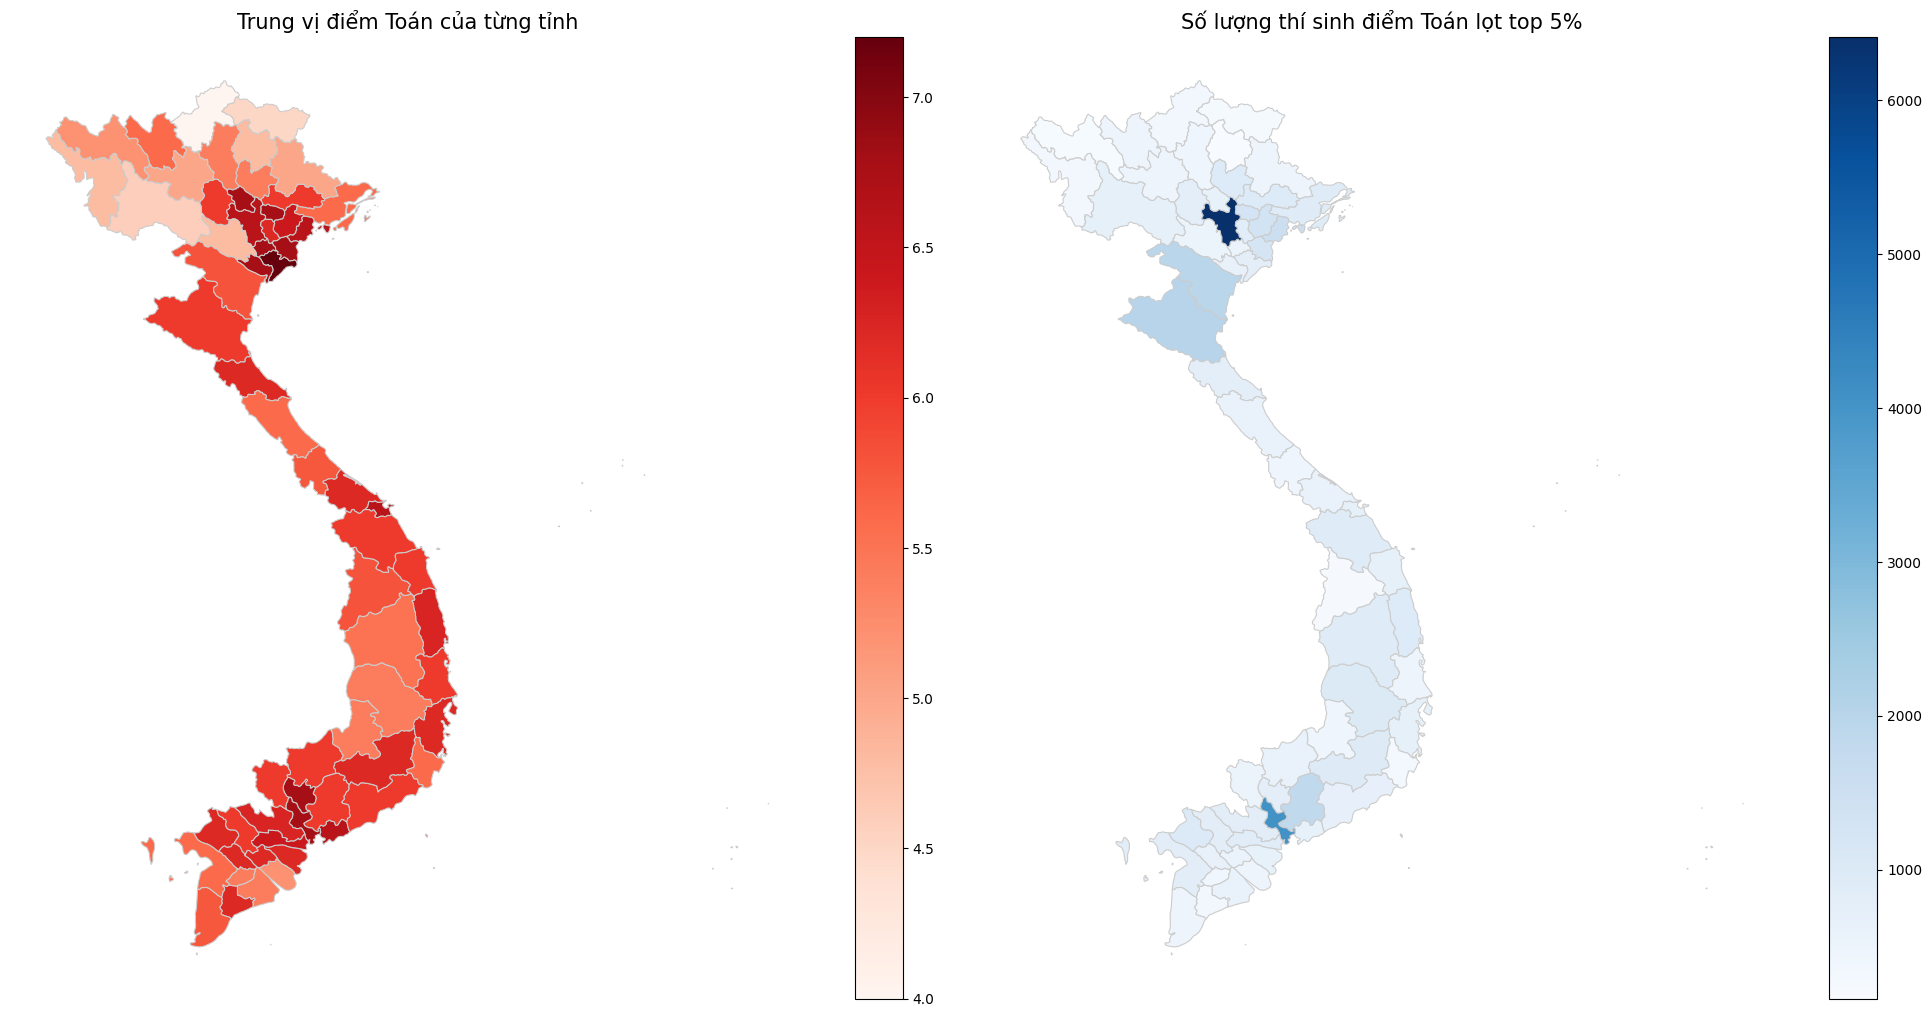

In [58]:
# Tạo hai bản đồ trên cùng một hình
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Bản đồ 1: Trung vị điểm toán
merged_median.plot(column='toan', cmap='Reds', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('Trung vị điểm Toán của từng tỉnh', fontdict={'fontsize': 15})
ax1.set_axis_off()

# Bản đồ 2: Số lượng thí sinh top 5%
merged_top_5.plot(column='count_top_5_percent', cmap='Blues', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('Số lượng thí sinh điểm Toán lọt top 5%', fontdict={'fontsize': 15})
ax2.set_axis_off()

plt.tight_layout()
plt.show()